# Project 4: Regression Analysis and Define Your Own Task!
### Serena Tang, Liwen Yang, Winston Wang

Data set chosen: Diamond Characteristics

### Question 1.1
- ***Plot a heatmap of the Pearson correlation matrix of the dataset columns. Report which features have the highest absolute correlation with the target variable. In the context of either dataset, describe what the correlation patterns suggest.***
    - For the diamond dataset, the price is the target variable. From the matrix plot, it appears that the diamond carat and x, y, and z dimensions have the highest absolute correlation with the price. This implies that the actual price of the diamond mainly rely on these factors; while factors like color and depth may play a role in the diamond price, they are not the main determining factors. 

In [68]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import diamond data
diamonds_df = pd.read_csv('diamonds.csv')

# convert categorical data into numerial data
diamonds_df['cut_int'] = pd.Categorical(diamonds_df['cut']).codes
diamonds_df['color_int'] = pd.Categorical(diamonds_df['color']).codes
diamonds_df['clarity_int'] = pd.Categorical(diamonds_df['clarity']).codes

Text(0.5, 1.0, 'Pearson Correlation Matrix')

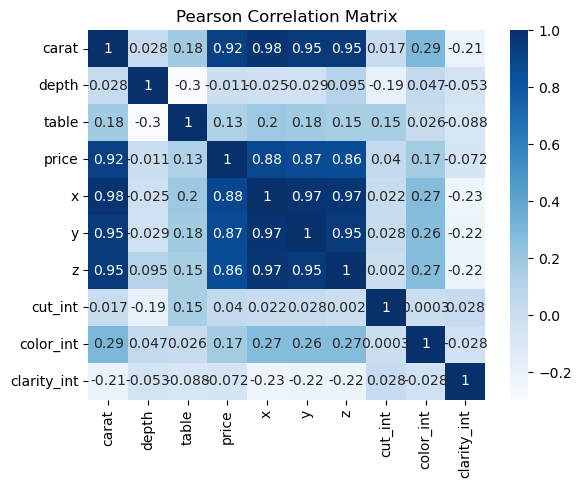

In [ ]:
sns.heatmap(diamonds_df[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'cut_int','color_int', 'clarity_int']].corr(), annot = True, cmap=plt.cm.Blues)
plt.title('Pearson Correlation Matrix')

### Question 1.2
- ***Plot the histogram of numerical features. What preprocessing can be done if the distribution of a feature has high skewness?***
    - The histogram of all the numerical features are shown below; from the plots, most of the data is very right skewed. The data can have a log transformation or a square root transformation on the data by apply the function to the data. Additionally, the data can be normalised to be zero mean with a standard deviation of 1. 

Text(0.5, 1.0, 'Diamond Z Frequency')

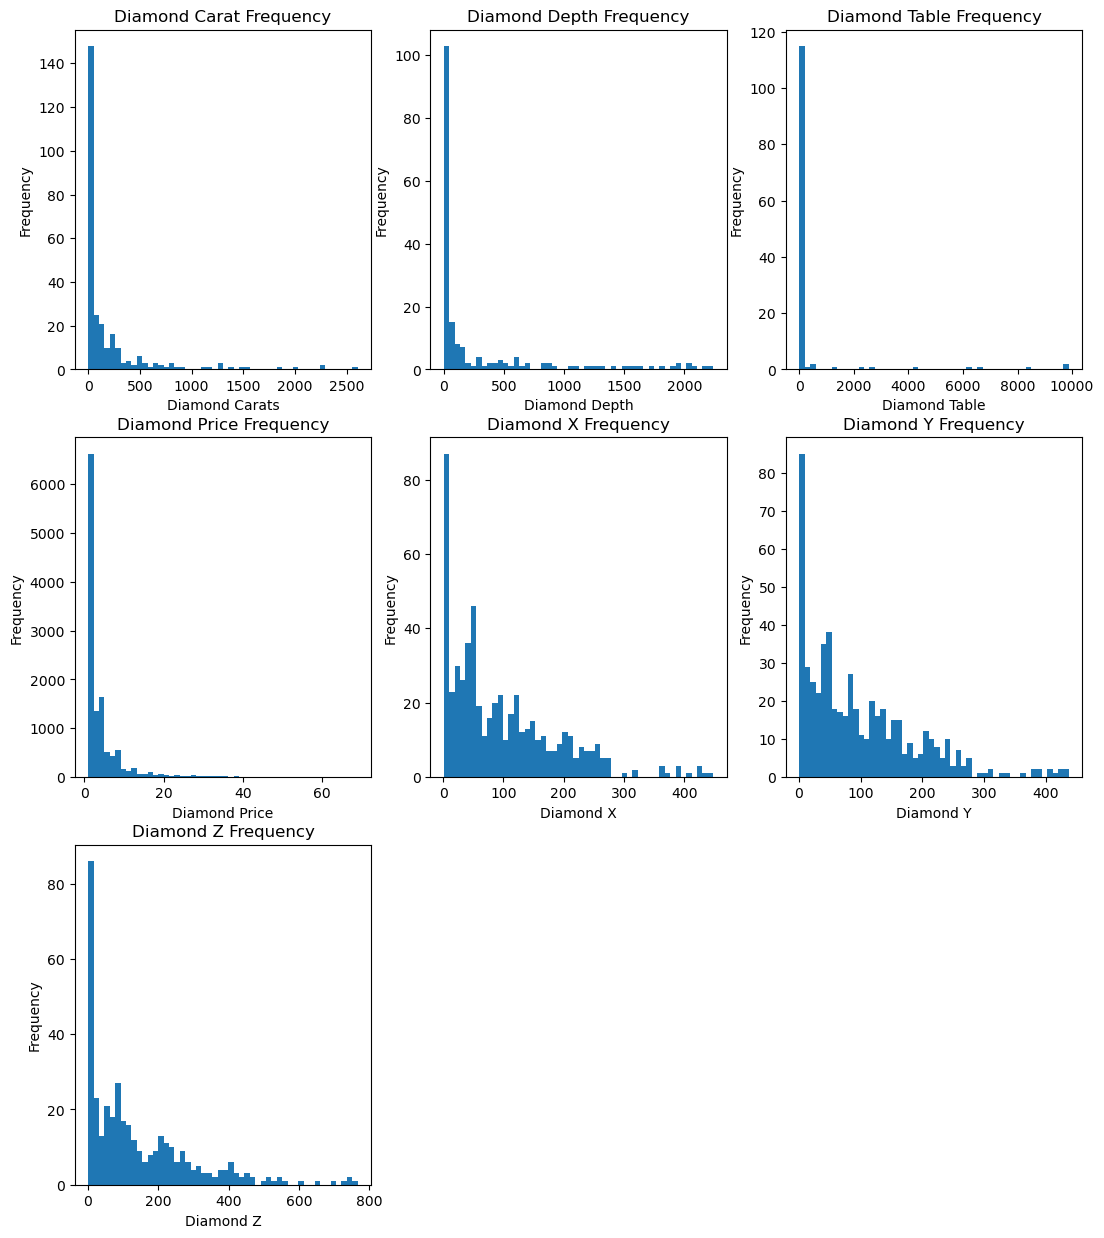

In [ ]:
plt.figure(figsize=(13, 15))
plt.subplot(3, 3, 1)
diamonds_df.carat.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Carats')
plt.title('Diamond Carat Frequency')

plt.subplot(3, 3, 2)
diamonds_df.depth.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Depth')
plt.title('Diamond Depth Frequency')

plt.subplot(3, 3, 3)
diamonds_df.table.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Table')
plt.title('Diamond Table Frequency')

plt.subplot(3, 3, 4)
diamonds_df.price.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Price')
plt.title('Diamond Price Frequency')

plt.subplot(3, 3, 5)
diamonds_df.x.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond X')
plt.title('Diamond X Frequency')

plt.subplot(3, 3, 6)
diamonds_df.y.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Y')
plt.title('Diamond Y Frequency')

plt.subplot(3, 3, 7)
diamonds_df.z.value_counts().plot.hist(bins=50)
plt.xlabel('Diamond Z')
plt.title('Diamond Z Frequency')

### Question 1.3
- ***Construct and inspect the box plot of categorical features vs target variable. What do you find?***
    - The box plots of all the categorical features are shown below. It appears that most of the data contains a lot of outliers, which skews the mean diamond price towards the higher prices. When outliers are not considered, the average diamond price is a lot lower. For diamond cuts, it appears that their cut does not have a large impact as they all have around the same price; interestingly, `ideal` has the lowest average diamond price. It appears that diamond colour and clarity has a bit more influence on the average price of the diamond as their average price changes depending on the diamond colour or clarity. 

Text(0.5, 1.0, 'Box plot of Diamond Clarity')

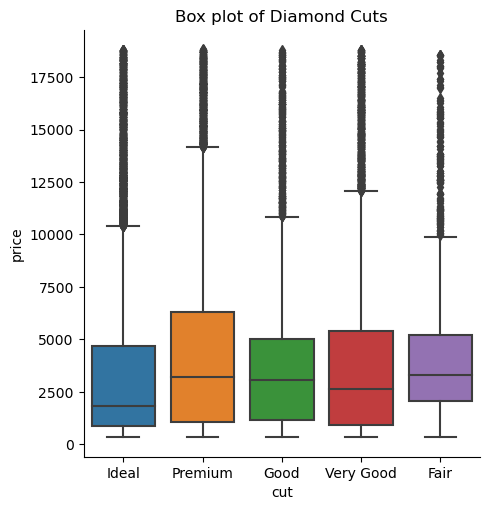

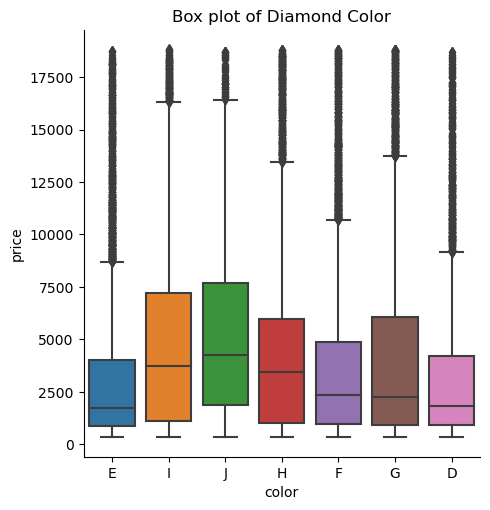

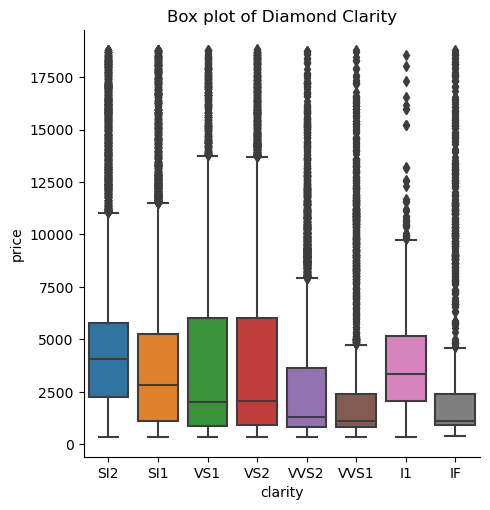

In [ ]:
sns.catplot(data=diamonds_df, x="cut", y="price", kind="box")
plt.title('Box plot of Diamond Cuts')


sns.catplot(data=diamonds_df, x="color", y="price", kind="box")
plt.title('Box plot of Diamond Color')


sns.catplot(data=diamonds_df, x="clarity", y="price", kind="box")
plt.title('Box plot of Diamond Clarity')

### Question 1.4
- ***For the Diamonds dataset, plot the counts by color, cut and clarity***
    - The 3 count plots are shown below.

Text(0, 0.5, 'Frequency')

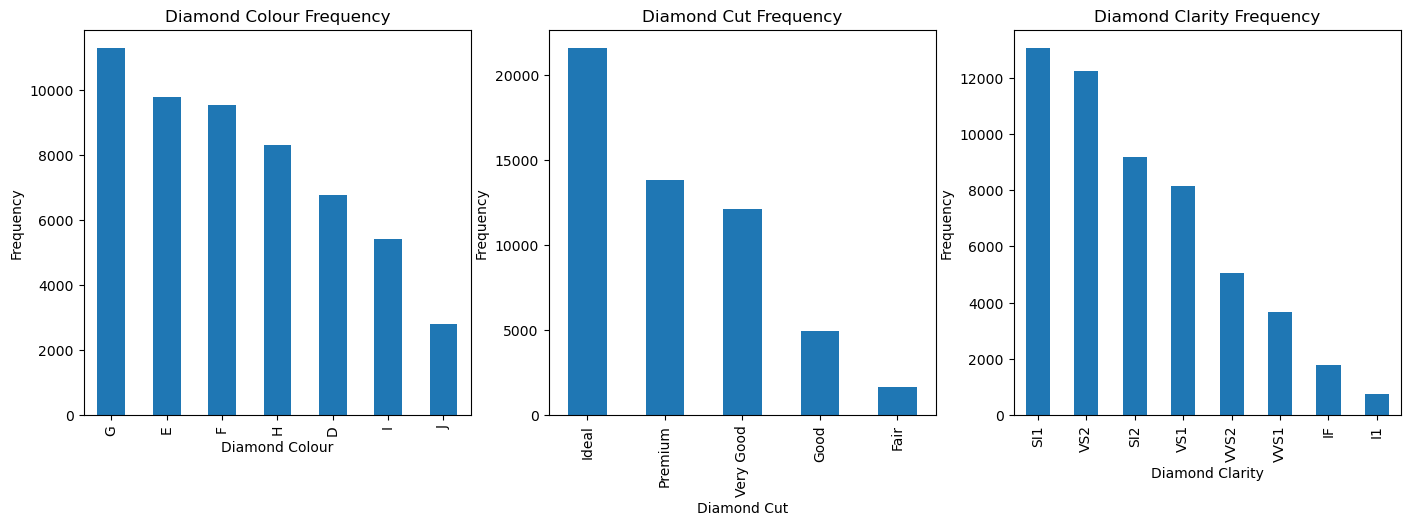

In [ ]:
plt.figure(figsize=(17, 5))
plt.subplot(1,3,1)
diamonds_df.color.value_counts().plot(kind='bar')
plt.xlabel('Diamond Colour')
plt.title('Diamond Colour Frequency')
plt.ylabel('Frequency')

plt.subplot(1,3,2)
diamonds_df.cut.value_counts().plot(kind='bar')
plt.xlabel('Diamond Cut')
plt.title('Diamond Cut Frequency')
plt.ylabel('Frequency')

plt.subplot(1,3,3)
diamonds_df.clarity.value_counts().plot(kind='bar')
plt.xlabel('Diamond Clarity')
plt.title('Diamond Clarity Frequency')
plt.ylabel('Frequency')

### Question 2.1
- ***Standardize feature columns and prepare them for training.***

In [69]:
# Only keep numerical data
diamonds_df['cut'] = diamonds_df['cut_int']
diamonds_df['color'] = diamonds_df['color_int']
diamonds_df['clarity'] = diamonds_df['clarity_int']

diamonds_df = diamonds_df.drop(columns=['clarity_int', 'color_int', 'cut_int', 'Unnamed: 0'])

In [ ]:
diamonds_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,330,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,327,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,328,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,337,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,338,4.34,4.35,2.75


In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# for 10 fold cross validation
def calc_rmse(model, kfold, X, y, name):
    rmse_train = 0
    rmse_test = 0
    for trainset, testset in kfold.split(X):
        scaler = StandardScaler()

        X_trainset, X_testset = X[trainset], X[testset]
        y_trainset, y_testset = y[trainset], y[testset]

        X_trainset = scaler.fit_transform(X_trainset)
        X_testset = scaler.transform(X_testset)

        model.fit(X_trainset, y_trainset)
        rmse_train+= mean_squared_error(y_trainset, model.predict(X_trainset), squared = False)
        rmse_test+=mean_squared_error(y_testset, model.predict(X_testset), squared = False)

    print('\nTraining Set RMSE using', name,': ', rmse_train/10)
    print('Validation Set RMSE using', name, ': ', rmse_test/10)

In [71]:
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

# data set without target values
diamond_X = diamonds_df.drop('price', axis=1)

# standardize X and y for determining model hyperparameters
X_train, X_test, y_train, y_test = train_test_split(diamond_X, diamonds_df.price, random_state = 0)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Question 2.2
- ***Describe how this step qualitatively affects the performance of your models in terms of test RMSE. Is it true for all model types? Also list two features for either dataset that has the lowest MI w.r.t to the target.***
    - The MI and F scores for the diamond dataset are shown below. The `depth` and `table` features have the lowest MI with respect to the target. 
    - The mutual score gives information that expresses the dependency between 2 variables; larger values indicate that 2 variables are highly dependent. The F score gives information that expresses how significant a variable is to the target; again, larger values indicate that a variable is very significant to the model. Therefore, if we built a model that uses the variables with the highest MI and F-score, our RMSE is most likely to decrease. Since the variables with lower scores are not included when training, the model may not learn this "noise" and thus help to prevent overfitting; this, thus, causes the improved RMSE value.
    - This may not be true for all model types as some models may be actually able to learn that some features are more important to use and some are less important; therefore, the RMSE may not change if you use the whole dataset vs only using the important features for training. 
    - Based on the MI and th F-score, the x, y, z, and carat characteristics of the diamond are important features to use when building the model. 

In [ ]:

from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import f_regression

# get mutual Info and Fscore
MutualInfo = mutual_info_regression(diamond_X, diamonds_df.price)
print('Mutual Info: ', MutualInfo)
MutualInfo_ranked = np.argsort(MutualInfo)
print('Lowest to Highest Mutual Info features: ',diamond_X.columns[MutualInfo_ranked])

Fscore = f_regression(diamond_X, diamonds_df.price)
print('\nF score: ', Fscore)
Fscore_rank = np.argsort(Fscore[0])[::-1]
print('Highest to Lowest F score features: ',diamond_X.columns[Fscore_rank])

Mutual Info:  [1.65031338 0.05535811 0.13691105 0.21783876 0.03135224 0.03365704
 1.41327605 1.4214478  1.36016173]
Lowest to Highest Mutual Info features:  Index(['depth', 'table', 'cut', 'color', 'clarity', 'z', 'x', 'y', 'carat'], dtype='object')

F score:  (array([3.04051487e+05, 8.58383374e+01, 1.65440124e+03, 2.77437196e+02,
       6.11586346e+00, 8.86119363e+02, 1.93741523e+05, 1.60915662e+05,
       1.54923267e+05]), array([0.00000000e+000, 2.02199849e-020, 0.00000000e+000, 3.88692175e-062,
       1.34004530e-002, 3.76996315e-193, 0.00000000e+000, 0.00000000e+000,
       0.00000000e+000]))
Highest to Lowest F score features:  Index(['carat', 'x', 'y', 'z', 'color', 'table', 'clarity', 'cut', 'depth'], dtype='object')


### Question 3
- ***Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets.***
    - The average RMSE errors for each model are shown in their respective portion of the project (ie. RMSE for the MLP is shown in the MLP portion of the project).

- ***What is the objective function? Train three models: (a) ordinary least squares (linear regression without regularization), (b) Lasso and (c) Ridge regression, and answer the following questions.***
    
    - The three trained models with their $R^2$ value and best alpha value and mean test and training RMSE scores are shown below.
    - The object function for the linear regression is $\displaystyle \min_{\theta} \lVert Y - X \theta \rVert_2^2$, where $Y$ is the target values, $X$ are the inputs, and $\theta$ is the learned parameter; in this, we wish to minimize the cost function with respect to $\theta$. In lasso regression, this becomes $\displaystyle \min_{\theta} \lVert Y - X \theta \rVert_2^2 + \alpha \lVert \theta \rVert_1$, where $\lVert \theta \rVert_1$ is the 1-norm of $\theta$. In ridge regression, this is $\displaystyle \min_{\theta} \lVert Y - X \theta \rVert_2^2 + + \alpha \lVert \theta \rVert_2^2$, where $\lVert \theta \rVert_2$ is the 2-norm of $\theta$. 

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import KFold

ols = linear_model.LinearRegression()
ols.fit(X_train,  y_train)
print('Ordinary Least Squares (no regularization) R^2 Value:', ols.score(X_test, y_test))

calc_rmse(ols, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'Ordinary Least Squares (no regularization)')

Ordinary Least Squares (no regularization) R^2 Value: 0.8869143366118493

Training Set RMSE using Ordinary Least Squares (no regularization) :  1341.9479023407057
Validation Set RMSE using Ordinary Least Squares (no regularization) :  1293.7622171098133


In [ ]:
alpha = range(1,5000,500)
alpha_acc = []

for i in alpha:
    lassoregress = linear_model.Lasso(alpha=i)
    lassoregress.fit(X_train,  y_train)
    print('Alpha Value:', i, '\tLasso Regression R^2 Value:', lassoregress.score(X_test, y_test))
    alpha_acc.append(lassoregress.score(X_test, y_test))

print('\nBest Alpha Value:', alpha[np.argmax(alpha_acc)])

lassoregress = linear_model.Ridge(alpha=alpha[np.argmax(alpha_acc)])

calc_rmse(lassoregress, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'Lasso Regression')

Alpha Value: 1 	Lasso Regression R^2 Value: 0.8868596891602718
Alpha Value: 501 	Lasso Regression R^2 Value: 0.8336342365008991
Alpha Value: 1001 	Lasso Regression R^2 Value: 0.7855128838454613
Alpha Value: 1501 	Lasso Regression R^2 Value: 0.7062348468598987
Alpha Value: 2001 	Lasso Regression R^2 Value: 0.5958001255442112
Alpha Value: 2501 	Lasso Regression R^2 Value: 0.45420871989839917
Alpha Value: 3001 	Lasso Regression R^2 Value: 0.28146062992246246
Alpha Value: 3501 	Lasso Regression R^2 Value: 0.07755585561640099
Alpha Value: 4001 	Lasso Regression R^2 Value: -2.2541043241730563e-05
Alpha Value: 4501 	Lasso Regression R^2 Value: -2.2541043241730563e-05

Best Alpha Value: 1

Training Set RMSE using Lasso Regression :  1341.9480563499226
Validation Set RMSE using Lasso Regression :  1293.8750159426625


In [ ]:
alpha = np.arange(1,100000,5000)
alpha_acc = []

for i in alpha:
    ridgeregress = linear_model.Ridge(alpha=i)
    ridgeregress.fit(X_train,  y_train)
    print('Alpha Value:', i, '\tRidge Regression R^2 Value:', ridgeregress.score(X_test, y_test))
    alpha_acc.append(ridgeregress.score(X_test, y_test))

print('\nBest Alpha Value:', alpha[np.argmax(alpha_acc)])

ridgeregress = linear_model.Ridge(alpha=alpha[np.argmax(alpha_acc)])

calc_rmse(ridgeregress, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'Ridge Regression')

Alpha Value: 1 	Ridge Regression R^2 Value: 0.8869114323833914
Alpha Value: 5001 	Ridge Regression R^2 Value: 0.8539401745929761
Alpha Value: 10001 	Ridge Regression R^2 Value: 0.8407834751805612
Alpha Value: 15001 	Ridge Regression R^2 Value: 0.830944194477585
Alpha Value: 20001 	Ridge Regression R^2 Value: 0.8218787062313002
Alpha Value: 25001 	Ridge Regression R^2 Value: 0.8130069509443836
Alpha Value: 30001 	Ridge Regression R^2 Value: 0.8041690584166092
Alpha Value: 35001 	Ridge Regression R^2 Value: 0.7953249544172902
Alpha Value: 40001 	Ridge Regression R^2 Value: 0.7864737687400211
Alpha Value: 45001 	Ridge Regression R^2 Value: 0.7776278387307083
Alpha Value: 50001 	Ridge Regression R^2 Value: 0.768803315911181
Alpha Value: 55001 	Ridge Regression R^2 Value: 0.760016553578118
Alpha Value: 60001 	Ridge Regression R^2 Value: 0.7512827094939843
Alpha Value: 65001 	Ridge Regression R^2 Value: 0.7426152563735935
Alpha Value: 70001 	Ridge Regression R^2 Value: 0.7340258799685542
Alp

### Question 4.1
- ***Explain how each regularization scheme affects the learned parameter set.***
    - In linear regression, we wish to learn $\theta$ such that the difference between the predicted and true target value is minimized. If we use lasso regression, it will cause some of the elements in $\theta$ to become zero; due to this, not every feature is used to calculate the predicted target value. Additionally, the stronger alpha is, the more values in $\theta$ become zero. This causes the reduced $R^2$ value as seen above compared with standard ordinary least squares.
    - If ridge regression is used, it causes values in $\theta$ to shrink as promotes the 2-norm of $\theta$ to be small; the closer alpha goes to inifity, the stronger the regularization affect will be. Therefore, the elements of $\theta$ are minimised. 

### Question 4.2
- ***Report your choice of the best regularization scheme along with the optimal penalty parameter and explain how you computed it.***
    - For lasso regression, we found the $R^2$ value of the model using several alpha values (the penality parameter) between 1 and 5000; as alpha approached infinity, the more the $R^2$ value decreased. From above, the best alpha value was found to be 1 with an $R^2$ value of 0.8868596891602718. 
    - Similarly for ridge regression, we found the $R^2$ value of the model using several alpha values between 1 and 100000; as alpha increased, the $R^2$ value also decreased but at a slower rate compared to lasso regression. The best alpha value was found to be 1 with an $R^2$ value of 0.8869114323833914; this implies that the actual optimal penality parameter is probably closer to 0 as the model without any regularization had the highest $R^2$ value out of the 3 models (0.8869143366118493). 
    - Overall, the best regularization scheme was using Ridge Regression with an alpha value of 1 as it had the largest $R^2$ value.

### Question 4.3
- ***Does feature standardization play a role in improving the model performance (in the cases with ridge regularization)? Justify your answer.***
    - Feature standardization plays a large role in improving the model performance using ridge regularization. From Question 4.1 and 4.2, it was noted that we wish to minimize the cost function with respect to $\theta$ and ridge regularization uses the 2 norm of $\theta$. In order to minimize the lost function, we wish for the 2-norm of $\theta$ to be as small as possible. If the features were not standardized, the regularizer will force elements in $\theta$ to shrink to compensate for the features as the optimal $\theta$ value relies on the features (the original data set could contain very large values/large means); if values of $\theta$ shrinks, our model may occur a higher loss/ lower $R^2$ value. On the other hand, if our features were standarized, $\theta$ will be minimized less severly since the features should be zero mean. Therefore, by feature standardization (so features more resemble standardly normally distributed data), our model will improve with ridge regularization. 

### Question 4.4
- ***Some linear regression packages return p-values for different features. What is the meaning of these p-values and how can you infer the most significant features?***
    - The p-value in statistics is used to test significance and is the probabability of obtaining a test result; if the p-value is below a certain threshold, we can reject the null hypothesis. In this case, the null hypothesis in the regression task tests for how significant a feature is, ie. if it's coefficient is 0 ($mx+b$ where $m$ is the coefficient), it has no effect on the accuracy. Therefore, the smaller the p-value is, the more likely a feature is to be significant in the model. In statistics, it is most common to reject the null hypothesis if it is less than 0.05. 


***Perform polynomial regression by crafting products of features you selected in part 3.1.4 up to a certain degree (max degree 6) and applying ridge regression on the compound features. You can use scikit-learn library to build such features. Avoid overfitting by proper regularization. Answer the following:***

### Question 5.1
- ***What are the most salient features? Why?***
    - The most salient features are those with the closest pearson correlation value closest to 1 as those are most likely to contribute the most for predicted the target value. The `carat` feature had to closest correlation to to the target value (0.92); this implies that it is the most salient feature. Other salient features include `x`, `y`, and `z` with coefficients of 0.88, 0.87, and 0.86, respectively. These also had the largest F score and mutual information score. 

### Question 5.2
- ***What degree of polynomial is best? How did you find the optimal degree? What does a very high-order polynomial imply about the fit on the training data? What about its performance on testing data?***
    - The $R^2$ value of all the polynomial models tried are shown below as well as the average training and testing RMSE of the model with the optimal polynomial degree. We also included the training and testing RMSE of all the different polynomial degree models. 
    - It was found that a degree of 2 worked the best; we found this by trying to fit the data to a polynomial of degree 2 to 6 and looking at the $R^2$ value. The polynomial degree that gave the highest $R^2$ value was considered the best. To note, although the decrease in the $R^2$ value is consistent, as in it consistently decreased, as the polynomial degree increased, the test set RMSE did not consistently increase as the degree also increased. However, a polynomial of degree 2 had the lowest test RMSE. 
    - Since higher order polynomials have the complexity to fit the training data closer to exactly, it is likely to overfit using the training data. This overfitting causes it to have a poor testing data performance as seen below.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_acc = []
degrees = list(range(2,7))

for i in degrees:
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X_train)
    ridgeregress = linear_model.Ridge(alpha=1)
    ridgeregress.fit(poly_features, y_train)
    print('\nPolynomial Degree:', i, '\tR^2 Value (Test Set):', ridgeregress.score(poly.transform(X_test), y_test))
    poly_acc.append(ridgeregress.score(poly.transform(X_test), y_test))
    calc_rmse(ridgeregress, KFold(n_splits=10), poly.fit_transform(diamond_X.to_numpy()), diamonds_df.price.to_numpy(), 'Polynomial Regression (Degree ' +  str(i) +')')

print('\nBest Polynomial Degree:', degrees[np.argmax(poly_acc)])

poly = PolynomialFeatures(degree=degrees[np.argmax(poly_acc)], include_bias=False)
ridgeregress = linear_model.Ridge(alpha=1)

calc_rmse(ridgeregress, KFold(n_splits=10), poly.fit_transform(diamond_X.to_numpy()), diamonds_df.price.to_numpy(), 'Polynomial Regression (Degree ' +  str(degrees[np.argmax(poly_acc)]) +')')



Polynomial Degree: 2 	R^2 Value (Test Set): 0.9283870053095118

Training Set RMSE using Polynomial Regression (Degree 2) :  1044.6785678856647
Validation Set RMSE using Polynomial Regression (Degree 2) :  1426.7180321346282

Polynomial Degree: 3 	R^2 Value (Test Set): 0.8715533509451907

Training Set RMSE using Polynomial Regression (Degree 3) :  962.9538931062636
Validation Set RMSE using Polynomial Regression (Degree 3) :  2886.463445452718

Polynomial Degree: 4 	R^2 Value (Test Set): -0.5941510275874013

Training Set RMSE using Polynomial Regression (Degree 4) :  902.1298418853014
Validation Set RMSE using Polynomial Regression (Degree 4) :  18245.09720472755


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.40739e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T



Polynomial Degree: 5 	R^2 Value (Test Set): -1214.3086080467497

Training Set RMSE using Polynomial Regression (Degree 5) :  835.2411887484425
Validation Set RMSE using Polynomial Regression (Degree 5) :  90329.68638840165

Polynomial Degree: 6 	R^2 Value (Test Set): -17884.89289090865

Training Set RMSE using Polynomial Regression (Degree 6) :  792.4499577497688
Validation Set RMSE using Polynomial Regression (Degree 6) :  443966.42163610144

Best Polynomial Degree: 2

Training Set RMSE using Polynomial Regression (Degree 2) :  1044.6785678856647
Validation Set RMSE using Polynomial Regression (Degree 2) :  1426.7180321346282


In [ ]:
for i in range(6,7):
    poly = PolynomialFeatures(degree=i, include_bias=False)
    poly_features = poly.fit_transform(X_train)
    ridgeregress = linear_model.Ridge(alpha=1)
    ridgeregress.fit(poly_features, y_train)
    #print('\nPolynomial Degree:', i, '\tR^2 Value (Test Set):', ridgeregress.score(poly.transform(X_test), y_test))
    #poly_acc.append(ridgeregress.score(poly.transform(X_test), y_test))
    calc_rmse(ridgeregress, KFold(n_splits=10), poly.fit_transform(diamond_X.to_numpy()), diamonds_df.price.to_numpy(), 'Polynomial Regression (Degree ' +  str(i) +')')

print('\nBest Polynomial Degree:', degrees[np.argmax(poly_acc)])

poly = PolynomialFeatures(degree=degrees[np.argmax(poly_acc)], include_bias=False)
ridgeregress = linear_model.Ridge(alpha=1)

calc_rmse(ridgeregress, KFold(n_splits=10), poly.fit_transform(diamond_X.to_numpy()), diamonds_df.price.to_numpy(), 'Polynomial Regression (Degree ' +  str(degrees[np.argmax(poly_acc)]) +')')


Training Set RMSE using Polynomial Regression (Degree 6) :  792.4499577497688
Validation Set RMSE using Polynomial Regression (Degree 6) :  443966.42163610144

Best Polynomial Degree: 2

Training Set RMSE using Polynomial Regression (Degree 2) :  1044.6785678856647
Validation Set RMSE using Polynomial Regression (Degree 2) :  1426.7180321346282


You will train a multi-layer perceptron (fully connected neural network). You can simply use the sklearn implementation:

### Question 6.1
- ***Adjust your network size (number of hidden neurons and depth), and weight decay as regularization. Find a good hyper-parameter set systematically (no more than 20 experiments in total).***
    - The process to find the best hyperparameters for the MLP is shown below as well as the RMSE for the 10 fold cross validation. Out of the combinations tried, using Relu, the ADAM optimizers, and 500 hidden layers of a depth of 3 (not including the output layer) and the default regularization strength gave the highest $R^2$ value of 98.08%.

In [ ]:
from sklearn.neural_network import MLPRegressor

for i in range(1,4):
    print('\n')
    for j in range(100,600,100):
        mlp = MLPRegressor(random_state=0, activation= 'relu', solver = 'adam', 
                           hidden_layer_sizes=np.repeat(j,i), max_iter=400, warm_start = True, early_stopping=True)

        mlp.fit(X_train, y_train)

        acc = mlp.score(X_test, y_test)
        print('Depth: ', i,'\tNumber of hidden layers: ', j, '\t R^2 Value:', acc)



Depth:  1 	Number of hidden layers:  100 	 R^2 Value: 0.9284596079166068
Depth:  1 	Number of hidden layers:  200 	 R^2 Value: 0.9292418808587118
Depth:  1 	Number of hidden layers:  300 	 R^2 Value: 0.9269376331662736
Depth:  1 	Number of hidden layers:  400 	 R^2 Value: 0.9365375755167298
Depth:  1 	Number of hidden layers:  500 	 R^2 Value: 0.9314249343176806


Depth:  2 	Number of hidden layers:  100 	 R^2 Value: 0.9393979408663292
Depth:  2 	Number of hidden layers:  200 	 R^2 Value: 0.978906634682613
Depth:  2 	Number of hidden layers:  300 	 R^2 Value: 0.978071491682516
Depth:  2 	Number of hidden layers:  400 	 R^2 Value: 0.9711850967508597
Depth:  2 	Number of hidden layers:  500 	 R^2 Value: 0.9791591600289224


Depth:  3 	Number of hidden layers:  100 	 R^2 Value: 0.9777263780114597
Depth:  3 	Number of hidden layers:  200 	 R^2 Value: 0.9785351384021881
Depth:  3 	Number of hidden layers:  300 	 R^2 Value: 0.9794656506816726
Depth:  3 	Number of hidden layers:  400 	 R^2 

In [74]:
mlp = MLPRegressor(random_state=0, activation= 'relu', solver = 'adam', 
                    hidden_layer_sizes=(500,500,500), max_iter=400, warm_start = True, early_stopping=True, alpha = 0.01)

mlp.fit(X_train, y_train)

acc = mlp.score(X_test, y_test)
print('L2 Regularization Alpha Value:',0.01,'\tR^2 Value:', acc)

L2 Regularization Alpha Value: 0.01 	R^2 Value: 0.9794744285703506


In [ ]:
mlp = MLPRegressor(random_state=0, activation= 'relu', solver = 'adam', 
                   hidden_layer_sizes=np.repeat(500,3), warm_start = True, early_stopping=True, max_iter=400)

calc_rmse(mlp, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'MLP')


Training Set RMSE using MLP :  521.4375334925128
Validation Set RMSE using MLP :  514.6037514171835


### Question 6.2
- ***How does the performance generally compare with linear regression? Why?***
    - The MLP performed much higher (almost 0.1 higher) than the linear regression, which had an $R^2$ value of 0.89. Since the MLP is able to train the weights to achieve a high accuracy (learn the training data), it is usually expected to perform better than linear regression. Additionally, if the data is not linear, the linear regression model is less likely to be able to accurately predict the target value; however, the MLP model does not require the input and output data to have a linear relationship. Therefore, the MLP generally is able to perform better than linear regression. 

### Question 6.3
- ***What activation function did you use for the output and why? You may use none.***
    - For the activation function, we used `relu` as it generally emperically works well in many neural networks. Additionally, it does not have gradient saturation for positive values, which helps the parameter learning process. If `tanh` or the `sigmoid` functions were used, they may saturate at extreme values and thus cause a poor learning process. 

### Question 6.4
- ***What is the risk of increasing the depth of the network too far?***
    - Increasing the network depth increases the model complexity, which can cause overfitting. The deeper the network is, the more the weights are able to be tuned to learn the data; however, this can cause a high training accuracy as the model can learn noise present in the data. This can cause there to be a low testing accuracy.

### Question 7.1

- ***Random forests have the following hyper-parameters. Explain how these hyper-parameters affect the overall performance. Describe if and how each hyper-parameter results in a regularization effect during training:***
    - ***Maximum number of features;***
        - The maximum number of features describe the number of features that the forest is able to consider in a tree. Increasing it can increase the overall performance as there are more options able to be tried; due to this, it will also tend to slow the algorithm speed. There is an optimal number of features as increasing it too much can decrease the performance. This has a regularization effect as having to consider many features can cause the model to overfit the data; by limiting the number of features a tree can consider, it helps to generalize the model and prevent overfitting. 
    - ***Number of trees;***
        - The number of trees determine the total amount of decision trees; increasing it can generally help generalization and thus increase the overall performance. This is due to the random forest using plurality voting; the more trees that are able to vote to decision the decision, the less prone the model will be to noise or errors. Since regularization is used to increased model generalization, the number of trees used during training has a regularization effect. 
    - ***Depth of each tree;***
        - This determines the height of each tree; the deeper a tree is, the more complex the model will be. Therefore, selecting an optimal tree depth will have a regularization effect as the model will be deep (complex) enough to model the data but not deep enough to cause overfitting. 

### Question 7.2

- ***How do random forests create a highly non-linear decision boundary despite the fact that all we do at each layer is apply a threshold on a feature?***
    - At each node of the decision tree, the data is essentially clusered based on the thresholds. As we go down the tree, the data is further separated and placed into a "class" to predict their target value (a diamond of a certain "class" actually belongs to some small range of predicted prices). Imagine having all the input data and initially separating them by clarity, then by cut, and so on until the last input variable, then it is easy to see that their "classes" are separated by non-linear decision boundaries, especially as there is no reliance on linear relationships. Additionally, some members of a class may lie farther than most points within that "class" which also contributes to the non-linear decision boundary. 

### Question 7.3

- ***Randomly pick a tree in your random forest model (with maximum depth of 4) and plot its structure. Which feature is selected for branching at the root node? What can you infer about the importance of this feature as opposed to others? Do the important features correspond to what you got in part 3.3.1?***
    - The random forest model $R^2$ value and RMSE is shown below as well as 1 tree's structure. The `y` feature is selected for branching at the root node which probably implies it is one of the most important factors for predicting the diamond target value. This feature corresponds to one of the salient features we got in 3.3.1 as it has one of the highest pearson correlation coefficients with the target value. Out of the other features used for branching (carat, clarity, x, colour), only `carat` and `x` are part of the salient features obtained in part 3.3.1. 

In [ ]:
from sklearn.ensemble import RandomForestRegressor

regr = RandomForestRegressor(max_depth=4, random_state=0, n_jobs=-1, max_features = 'auto', oob_score=True)
regr.fit(X_train, y_train)
print('Random Forest R^2 Value:', regr.score(X_test, y_test))

calc_rmse(regr, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'Random Forest')

Random Forest R^2 Value: 0.914660792949236

Training Set RMSE using Random Forest :  1143.7044997744758
Validation Set RMSE using Random Forest :  1373.1834548639977


[Text(0.5, 0.9, 'carat <= 0.395\nsquared_error = 15871662.949\nsamples = 25559\nvalue = 3940.876'),
 Text(0.25, 0.7, 'y <= -0.172\nsquared_error = 1232655.008\nsamples = 16451\nvalue = 1628.608'),
 Text(0.125, 0.5, 'carat <= -0.722\nsquared_error = 267250.609\nsamples = 11814\nvalue = 1056.106'),
 Text(0.0625, 0.3, 'x <= -0.984\nsquared_error = 53556.976\nsamples = 8232\nvalue = 785.558'),
 Text(0.03125, 0.1, 'squared_error = 35660.679\nsamples = 5663\nvalue = 706.018'),
 Text(0.09375, 0.1, 'squared_error = 48044.688\nsamples = 2569\nvalue = 962.221'),
 Text(0.1875, 0.3, 'clarity <= 0.964\nsquared_error = 206326.283\nsamples = 3582\nvalue = 1674.01'),
 Text(0.15625, 0.1, 'squared_error = 153579.554\nsamples = 2953\nvalue = 1578.644'),
 Text(0.21875, 0.1, 'squared_error = 209886.756\nsamples = 629\nvalue = 2123.827'),
 Text(0.375, 0.5, 'carat <= 0.142\nsquared_error = 763264.696\nsamples = 4637\nvalue = 3068.406'),
 Text(0.3125, 0.3, 'color <= 0.537\nsquared_error = 410736.978\nsamples 

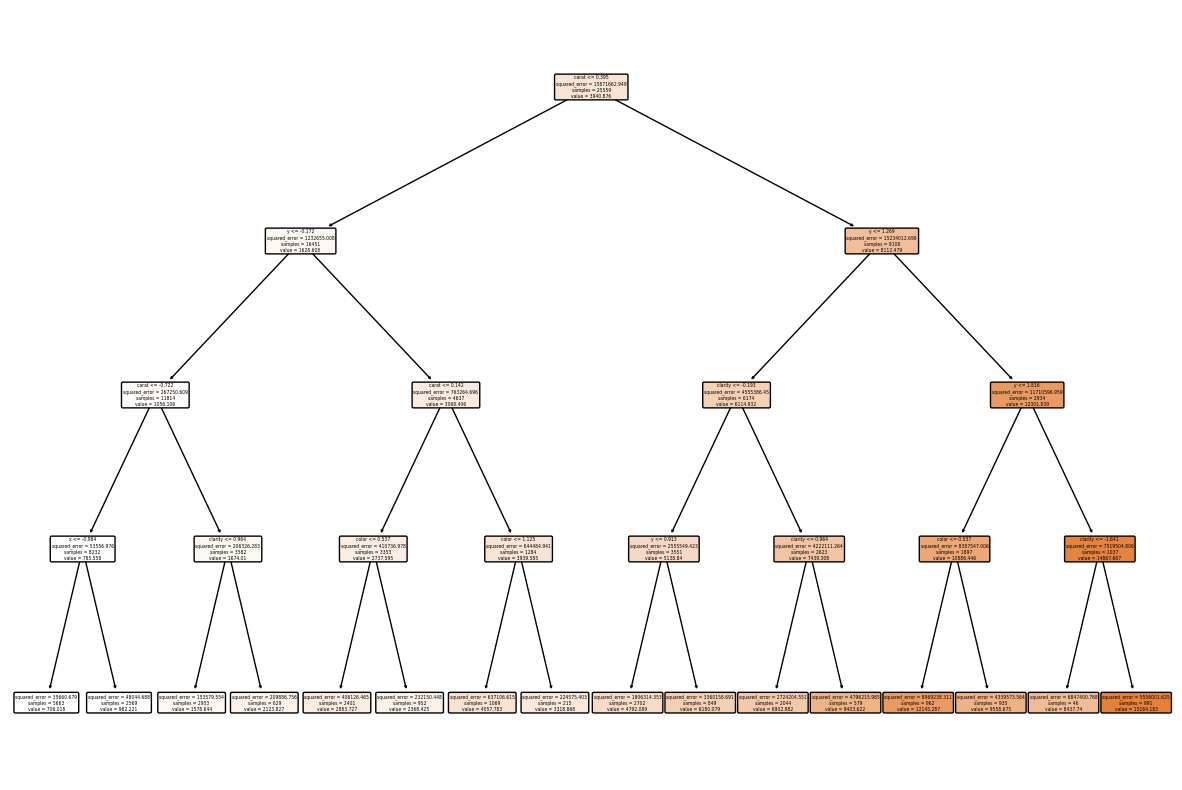

In [ ]:
from sklearn.tree import plot_tree
fig = plt.figure(figsize=(15, 10))

plot_tree(regr.estimators_[5], 
          feature_names=list(diamond_X.columns),
          class_names=y_test, 
          filled=True, impurity=True, 
          rounded=True)

### Question 7.4
- ***Measure “Out-of-Bag Error” (OOB). Explain what OOB error and $R^2$ score means.***
    - The OOB error is calculated when the random forest model is trained using bootstrapping. The model sets aside an out of bag sample and uses the rest of the training data to train the model. The model is then evaluated using the out of bag sample; there OOB error is thus the percentage of incorrect predictions using the OOB sample. Therefore, a lower OOB error implies that the model is doing a better job of predicting. Since the random forest is used for regression here, the OOB here is calculated using the $R^2$ score. This score is used to express the proportion of variance for a dependent variable that is explained by the independent variables. The closer the score is to 1, the better the model is able to fit a data. 
    - The OOB error of the random forest regressor is shown below. 

In [ ]:
print('OOB Error:', 1- regr.oob_score_)

OOB Error: 0.08631528175534209


### Question 8.1 

- ***Read the documentation of LightGBM OR CatBoost and determine the important hyperparameters along with a search space for the tuning of these parameters (keep the search space small).***
    - For the search space of LightGBM, we decided to use all 3 types of boosting types and both types of data sample strategies. For the objective function, we considered both L1 and L2 regression as well as Huber loss as it is used in robust regression. For the rest of the options, we decided to choose relative values that may work. The full search space is shown below. 

### Question 8.2
- ***Apply Bayesian optimization using skopt.BayesSearchCV from scikit-optmize to find the ideal hyperparameter combination in your search space. Report the best hyperparameter set found and the corresponding RMSE.***
    - The best hyperparameter set that was found and its RMSE is shown below as well as its accuracy. 

In [ ]:
import lightgbm as lgb
import numpy as np
from skopt import BayesSearchCV
from skopt.space import Real, Integer

lgbr = lgb.LGBMRegressor(objective = "regression", n_jobs = -1, random_state = 42,
                         learning_rate = 0.1, n_estimators = 200)

opt = BayesSearchCV(lgbr, 
                    {
                        "boosting_type": ['gbdt', 'dart','rf'],
                        "objective":['regression', 'regression_l1', 'huber'],
                        "data_sample_strategy":['bagging','goss'],
                        "max_depth": Integer(-1, 13),
                        "num_leaves": Integer(20, 200),
                        "min_child_samples": Integer(7, 75),
                        "colsample_bytree": Real(0.25, 1),
                        "reg_alpha": Real(0, 1),
                        "reg_lambda": Real(0, 1),
                        "bagging_fraction": np.arange(0.1,1,0.1),
                        "bagging_freq": np.arange(1,20),
                        "min_split_gain": Real(0, 0.5),
                        #"verbose": -1,
                    },
                    n_iter = 150,
                    cv = 10,
                    n_jobs = -1,
                    scoring = "neg_root_mean_squared_error",
                    random_state = 42
                   )

opt.fit(X_train, y_train)

print("\nBest R^2 Value is: ", opt.best_score_, "\n")

print("Best Parameters: ", opt.best_params_, "\n")

[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8

Best R^2 Value is:  -534.2637505346037 

Best Parameters:  OrderedDict([('bagging_fraction', 0.9), ('bagging_freq', 8), ('boosting_type', 'gbdt'), ('colsample_bytree', 0.7255338479797805), ('data_sample_strategy', 'bagging'), ('max_depth', 0), ('min_child_samples', 7), ('min_split_gain', 0.4262942916178735), ('num_leaves', 69), ('objective', 'regression'), ('reg_alpha', 0.2656451665664409), ('reg_lambda', 0.4593425207466776)]) 



In [ ]:
lgbr2 = opt.best_estimator_
print("Best Regressor hyperparameters: ",lgbr2)

Best Regressor hyperparameters:  LGBMRegressor(bagging_fraction=0.9, bagging_freq=8,
              colsample_bytree=0.7255338479797805,
              data_sample_strategy='bagging', max_depth=0, min_child_samples=7,
              min_split_gain=0.4262942916178735, n_estimators=200,
              num_leaves=69, objective='regression', random_state=42,
              reg_alpha=0.2656451665664409, reg_lambda=0.4593425207466776)


In [ ]:
lgbr2.fit(X_train, y_train)
print('\nLightGBM R^2 Value:', lgbr2.score(X_test, y_test))


LightGBM R^2 Value: 0.9814798414403982


In [ ]:
calc_rmse(lgbr2, KFold(n_splits=10), diamond_X.to_numpy(), diamonds_df.price.to_numpy(), 'LightGBM')

[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. Current value: bagging_fraction=0.9
[LightGBM] [Warning] bagging_freq is set=8, subsample_freq=0 will be ignored. Current value: bagging_freq=8
[LightGBM] [Warning] Unknown parameter: data_sample_strategy
[LightGBM] [Warning] bagging_fraction is set=0.9, subsample=1.0 will be ignored. 

### Question 8.3
- ***Qualitatively interpret the effect of the hyperparameters using the Bayesian optimization results: Which of them helps with performance? Which helps with reglarization (shrinks the generalization gap)? Which affects the fitting efficiency?***
    - Based on the documentation, the hyperparameters that help with performance are increasing `num_leaves`, which can increase model complexity (which increases accuracy), and using a smaller `learning_rate` and larger `num_iterations`, since it smaller step sizes in gradient descent can be used to better find a local minima across a longer period of time. 
    - Based on the documentation, hyperparameters that can help with regularization include using `reg_alpha`, `reg_lambda`, `min_gain_to_split`, `bagging_freq`, and `bagging_fraction`. Both `reg_alpha` and `reg_lambda` control the regularization penalities, which can help the model prevent overfitting. Using `min_gain_to_split` can also control the loss required to make another split in the tree. `bagging_freq` and `bagging_fraction` are all used in bagging, which is commonly used for regularization. Setting a `max_depth` can also increase regularization as it prevents the decision tree from becoming too deep; deep trees increase model complexity, which can cause overfitting. 
    - Finally, based on the documentation, hyperparameters that can help with fitting efficiency include decreasing the `max_depth` and `num_leaves`. By limiting the tree depth  and the number of nodes, the model is able to train faster. Additionally, increasing `min_gain_to_split` also reduces training time. Additionally, increasing `learning_rate` may allow the model to step faster into a local/global minimia in the cost function. Decreasing `num_interations` can also allow the model is train for a lesser amount of time by requiring less boosting rounds; decreasing the number of iterations and increasing the learning rate usually go hand in hand. Decreasing `feature_fraction` can also decrease training time by only using a subject of the features when constructing the trees. Finally, decreasing `bagging_freq` can also decrease training time as it controls how often the model resamples the data.
    

### Question 9.1

- ***Report the following statistics for each hashtag:***
    - ***Average number of tweets per hour***
    - ***Average number of followers of users posting the tweets per tweet (to make it simple, we average over the number of tweets; if a users posted twice, we count the user and the user’s followers twice as well)***
    - ***Average number of retweets per tweet***
    - The statistics for each hashtag are shown below. 

In [3]:
import ujson
import datetime

def tweet_stats(name, tweet_list):
    n = len(tweet_list)
    num_retweet = 0
    num_followers = 0
    time_posted = []
    for i in range(n):
        num_retweet += tweet_list[i]['metrics']['citations']['total']
        num_followers += tweet_list[i]['author']['followers']
        time_posted.append(datetime.datetime.fromtimestamp(tweet_list[i]['citation_date']))
    
    total_hours = (max(time_posted)-min(time_posted)).total_seconds()/60/60
    print('\n', name,'statistics')
    print('Average number of tweets per hour', n/total_hours)
    print('Average number of followers of users posting the tweets per tweet: ', num_followers/n)
    print('Average number of retweets per tweet: ', num_retweet/n)


In [4]:
txt_file = open('tweets_#gohawks.txt', 'r')
gohawks_tweets = []
for line in txt_file:
    gohawks_tweets.append(ujson.loads(line))

txt_file = open('tweets_#gopatriots.txt', 'r')
gopatriots_tweets = []
for line in txt_file:
    gopatriots_tweets.append(ujson.loads(line))

txt_file = open('tweets_#nfl.txt', 'r')
nfl_tweets = []
for line in txt_file:
    nfl_tweets.append(ujson.loads(line))

In [ ]:
tweet_stats('#gohawks', gohawks_tweets)

tweet_stats('#gopatriots', gopatriots_tweets)

tweet_stats('#nfl', nfl_tweets)


 #gohawks statistics
Average number of tweets per hour 292.48785062173687
Average number of followers of users posting the tweets per tweet:  2217.9237355281984
Average number of retweets per tweet:  2.0132093991319877

 #gopatriots statistics
Average number of tweets per hour 40.95469800606194
Average number of followers of users posting the tweets per tweet:  1427.2526051635405
Average number of retweets per tweet:  1.4081919101697078

 #nfl statistics
Average number of tweets per hour 397.0213901819841
Average number of followers of users posting the tweets per tweet:  4662.37544523693
Average number of retweets per tweet:  1.5344602655543254


In [ ]:
txt_file = open('tweets_#patriots.txt', 'r')
patriots_tweets = []
for line in txt_file:
    patriots_tweets.append(ujson.loads(line))

In [ ]:
txt_file = open('tweets_#sb49.txt', 'r')
sb49_tweets = []
for line in txt_file:
    sb49_tweets.append(ujson.loads(line))

In [ ]:
tweet_stats('#patriots', patriots_tweets)

tweet_stats('#sb49', sb49_tweets)


 #patriots statistics
Average number of tweets per hour 750.89426460689
Average number of followers of users posting the tweets per tweet:  3280.4635616550277
Average number of retweets per tweet:  1.7852871288476946

 #sb49 statistics
Average number of tweets per hour 1276.8570598680474
Average number of followers of users posting the tweets per tweet:  10374.160292019487
Average number of retweets per tweet:  2.52713444111402


In [ ]:
superbowl_tweets = []
superbowl_file = open('tweets_#superbowl.txt', 'r')
for line in superbowl_file:
    superbowl_tweets.append(ujson.loads(line))

In [ ]:
tweet_stats('#superbowl', superbowl_tweets)


 #superbowl statistics
Average number of tweets per hour 2072.1184017040796
Average number of followers of users posting the tweets per tweet:  8814.96799424623
Average number of retweets per tweet:  2.3911895819207736


### Question 9.2
- ***Plot “number of tweets in hour” over time for #SuperBowl and #NFL (a bar plot with 1-hour bins). The tweets are stored in separate files for different hashtags and files are named as tweet [#hashtag].txt.***

In [ ]:
import matplotlib.pyplot as plt

def plot_tweet_hour(name, datalist):
    n = len(datalist)
    time_posted = {}
    all_tweet_times = []
    for i in range(n):
        tweet_time = (datetime.datetime.fromtimestamp(datalist[i]['citation_date']))
        all_tweet_times.append(tweet_time)
        if tweet_time.strftime('%d-%m-%H') not in time_posted.keys():
            time_posted[tweet_time.strftime('%d-%m-%H')] = 1
        else:
            time_posted[tweet_time.strftime('%d-%m-%H')] += 1
    tweet_time_sort = sorted(all_tweet_times)
    x = []
    y = []
    for tweet in tweet_time_sort:
        if tweet.strftime('%d-%m-%H') not in x:
            x.append(tweet.strftime('%d-%m-%H'))
            y.append(time_posted[tweet.strftime('%d-%m-%H')])

    plt.bar(range(len(x)),y,1)
    plt.title('Number of Tweets per Hour for ' + name)
    plt.xlabel('Hour')
    plt.ylabel('Number of Tweets')

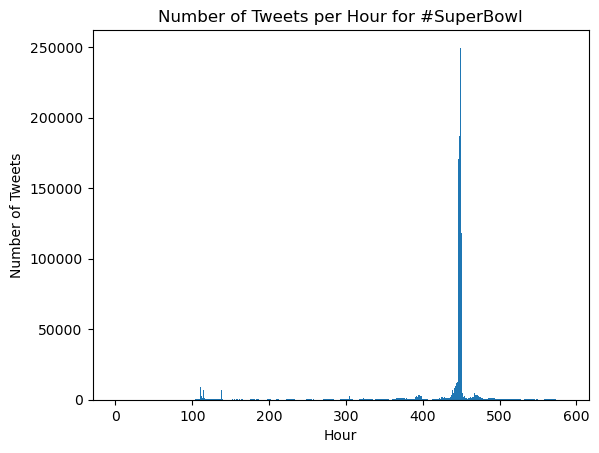

In [ ]:
plot_tweet_hour('#SuperBowl', superbowl_tweets)

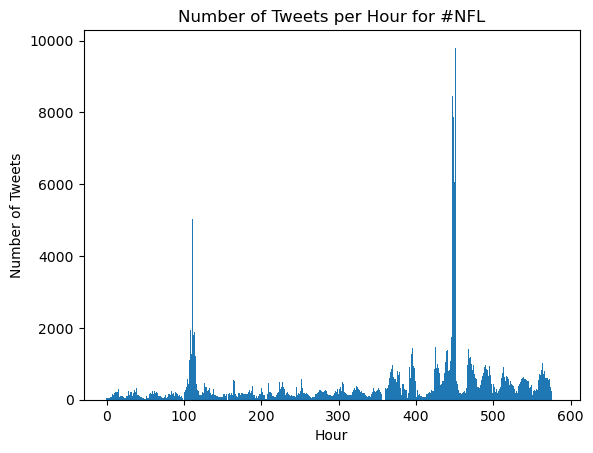

In [ ]:
plot_tweet_hour('#NFL', nfl_tweets)

### Question 10

- ***Describe your task.***
    - For the Twitter Data analysis section, we wish to use a tweet to predict the team a user is a fan of using `#gohawks` or `#gopatriots`, its number of retweets, likes, replies, and the relative time it was posted at. In order to accomplish this, we chose to explore some of the data with in the tweets and attempt to use several machine learning algorithms for prediction. 
- ***Explore the data and any metadata (you can even incorporate additional datasets if you choose). Describe the feature engineering process. Implement it with reason: Why are you extracting features this way - why not in any other way?***
    - In order to explore the data, we merged the two hashtag data together; however, we did not keep all of the data. When we explored what each dataset contained, we decided to only keep data that may give information about the hashtag used, number of likes/retweets/quotes, and the relative time it was posted at; information such as URLs, extraneous user information (media, profile links, colours, etc), and others were discarded as they are less useful to determining our target values. Additionally, we only considered tweets that were written in English as tweets in other languages may be considered noise. Among the target values we wish to predict, we also kept information about user location, tweet ranking score, tweet impressions, number of tweet replies, and the user follower count. These columns were kept as user location may give insight on the team a user may be a fan of and ranking score, impressions, number of replies, and follower count tend to affect how many likes and retweets a tweet may recieve. 

In [1]:
import pandas as pd

# extracting features from the hashtag files
def extract_features(tweetlist, name):
    tweets = pd.DataFrame.from_dict(tweetlist)
    tweet = pd.DataFrame.from_dict(list(tweets.tweet))
    tweet = tweet[['text','id','favorite_count', 'retweet_count', 'user','lang']]
    tweets = tweets.drop(columns=['tweet','url', 'highlight', 'citation_url', 'author', 'original_author','type'])
    tweets = pd.concat([tweets, tweet], axis=1)
    tweets['hashtag'] = [name]*tweets.shape[0]
    tweet = pd.DataFrame.from_dict(list(tweets.metrics))
    tweet = tweet[['ranking_score','impressions','citations']]
    tweets = tweets.drop(columns=['metrics'])
    tweets = pd.concat([tweets, tweet], axis=1)
    tweet = pd.DataFrame.from_dict(list(tweets.citations))
    tweet = tweet[['total','replies']]
    tweets = tweets.drop(columns=['citations'])
    tweets = pd.concat([tweets, tweet], axis=1)
    tweet = pd.DataFrame.from_dict(list(tweets.user))
    tweet = tweet[['followers_count','location']]
    tweets = tweets.drop(columns=['user','title'])
    tweets = pd.concat([tweets, tweet], axis=1)
    tweets = tweets[tweets.lang == 'en']
    tweets = tweets.drop(columns=['lang'])
    tweets = tweets.drop(columns=['firstpost_date', 'id'])
    return tweets

In [5]:
# extract features from #gohawks and #gopatriots and merge them

gohawks_df = extract_features(gohawks_tweets, '#gohawks')
gopatriots_df = extract_features(gopatriots_tweets, '#gopatriots')

tweets_df = pd.concat([gohawks_df, gopatriots_df], ignore_index=True, sort=False)
tweets_df.to_csv('tweets.csv', index=False)

In [38]:
tweets_df = pd.read_csv('tweets.csv')
tweets_df.head()

,citation_date,text,favorite_count,retweet_count,hashtag,ranking_score,impressions,total,replies,followers_count,location
0,1421518778,I &lt;3 our defense! #GoHawks http://t.co/U1pc...,1,2,#gohawks,4.743703,1754,5,0,2318,Ontario
1,1421259536,twelfth dogs are ready! #gohawks #dogslife htt...,0,0,#gohawks,3.646109,162,2,0,12,"Redmond, WA"
2,1421468519,"""Oh no big deal, just NFC West Champs and the ...",0,0,#gohawks,3.500887,5,5,0,1998,Seattle
3,1421468336,"Good luck at Michigan, Jim Harbaugh. #GoHawks ...",1,1,#gohawks,3.759005,5,2,0,595,"Buffalo, Wyoming"
4,1421468176,@FiveThirtyEight #GoHawks. Keep your eyes on t...,1,1,#gohawks,3.718140,5,2,0,432,"McChord AFB, WA"


In [39]:
# convert categorical data into numerial data
tweets_df['hashtag_int'] = pd.Categorical(tweets_df['hashtag']).codes

# calculate number of quote retweets
tweets_df['quote_count'] =  tweets_df['total'] - tweets_df['retweet_count']
tweets_df.rename(columns={"total": "total_retweets"}, inplace=True)
tweets_df.head()

,citation_date,text,favorite_count,retweet_count,hashtag,ranking_score,impressions,total_retweets,replies,followers_count,location,hashtag_int,quote_count
0,1421518778,I &lt;3 our defense! #GoHawks http://t.co/U1pc...,1,2,#gohawks,4.743703,1754,5,0,2318,Ontario,0,3
1,1421259536,twelfth dogs are ready! #gohawks #dogslife htt...,0,0,#gohawks,3.646109,162,2,0,12,"Redmond, WA",0,2
2,1421468519,"""Oh no big deal, just NFC West Champs and the ...",0,0,#gohawks,3.500887,5,5,0,1998,Seattle,0,5
3,1421468336,"Good luck at Michigan, Jim Harbaugh. #GoHawks ...",1,1,#gohawks,3.759005,5,2,0,595,"Buffalo, Wyoming",0,1
4,1421468176,@FiveThirtyEight #GoHawks. Keep your eyes on t...,1,1,#gohawks,3.718140,5,2,0,432,"McChord AFB, WA",0,1


- To explore the relationship between the numerical values of the dataset (excluding the timestamp of when the tweet was posted), we plotted a heatmap of the Pearson correlation matrix; this is shown below. From it, we can see that the amount of favourites and the amount of retweets a tweet recieved are heavily correlated, which makes sense as users tend to due both actions to a tweet they like. It also appears that the total number of retweets (retweets and quote retweets) are somewhat strongly correlated with the favourite count and number of retweets a tweet recieves. This also makes sense as the total number of retweets contains the number of retweets; the reduced correlation may be due to the number of quote retweets a tweet recieves as users are more likely to retweet a tweet than quote retweet it. The number of replies is also somewhat correlated to the number of favourites and retweets a tweet recieves, which also make sense as many users on Twitter are less likely to reply to a tweet than like/retweet it. Additionally, the ranking score is slightly correlated with the number of impressions a tweet recieves and followers a user has; this may be due to users with a lot of followers likely having tweets with a lot of impressions, which may increase its ranking score. The number of impressions a tweet has is also somewhat strongly correlated the total number of retweets, replies, user follower count, and number of quote retweets; again, this is pretty expected as retweets can increase the impression count by introducing the tweet to a new set of users from the retweeters follower count. Additionally, users with more followers are more likely to have their tweets seen by a larger audience; the more users see the tweet, the more likely the tweet will have a reply. This can also explain the slightly correlation between the number of followers a user has and the number of replies a tweet has. Finally, we see that the number of followers is slightly correlated with the number of quote retweets a tweet has; again, this makes sense as users with a large following are more likely to recieve interactions with their tweet. 

Text(0.5, 1.0, 'Pearson Correlation Matrix')

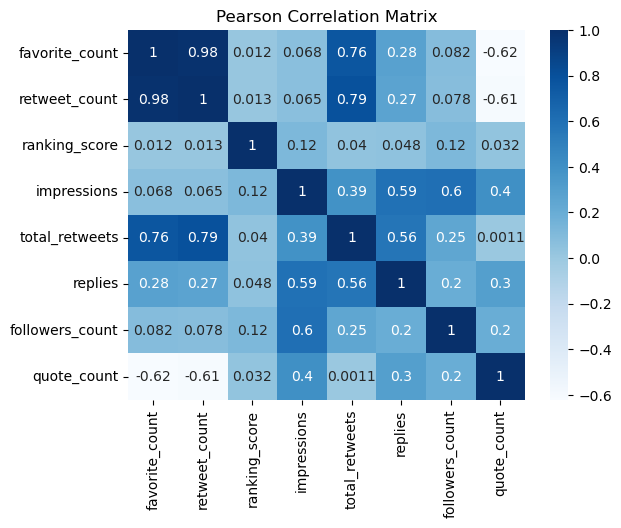

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(tweets_df[['favorite_count', 'retweet_count', 'ranking_score', 'impressions', 'total_retweets', 'replies', 'followers_count', 'quote_count']].corr(), annot = True, cmap=plt.cm.Blues)
plt.title('Pearson Correlation Matrix')

Text(0.5, 1.0, 'Quote Retweet Frequency')

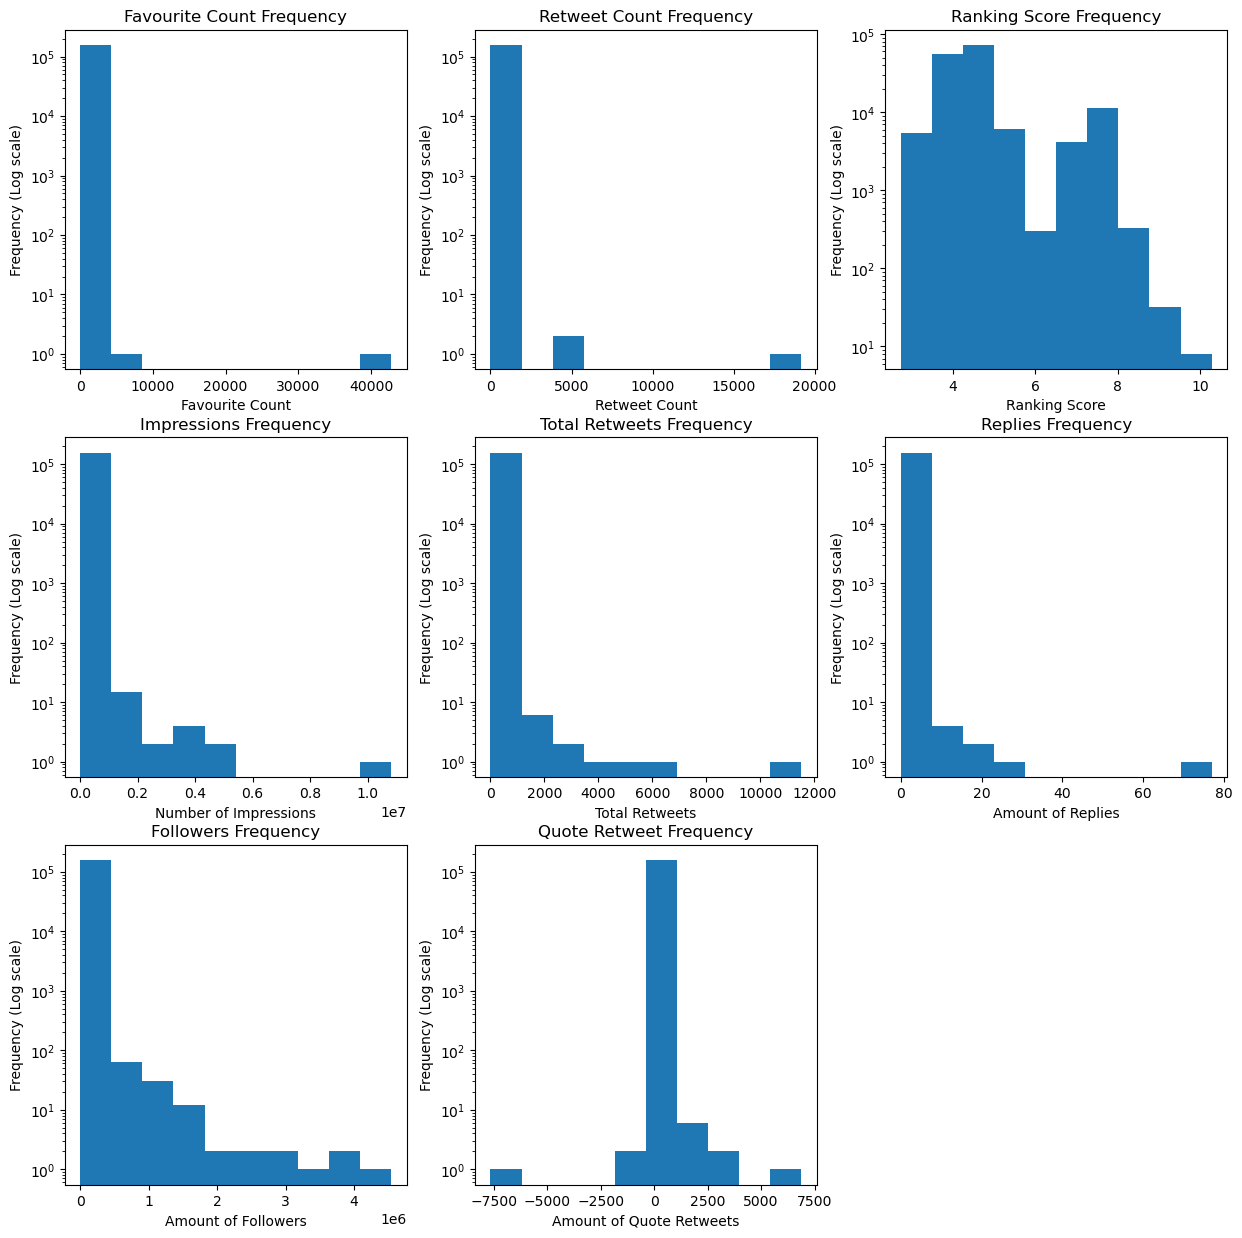

In [13]:
plt.figure(figsize=(15, 15))
plt.subplot(3, 3, 1)
plt.hist(tweets_df['favorite_count'], log=True)
plt.ylabel('Frequency (Log scale)')
plt.xlabel('Favourite Count')
plt.title('Favourite Count Frequency')

plt.subplot(3, 3, 2)
plt.hist(tweets_df['retweet_count'], log=True)
plt.ylabel('Frequency (Log scale)')
plt.xlabel('Retweet Count')
plt.title('Retweet Count Frequency')

plt.subplot(3, 3, 3)
plt.hist(tweets_df['ranking_score'], log=True)
plt.ylabel('Frequency (Log scale)')
plt.xlabel('Ranking Score')
plt.title('Ranking Score Frequency')

plt.subplot(3, 3, 4)
plt.hist(tweets_df['impressions'], log=True)
plt.ylabel('Frequency (Log scale)')
plt.xlabel('Number of Impressions')
plt.title('Impressions Frequency')

plt.subplot(3, 3, 5)
plt.hist(tweets_df['total_retweets'], log=True)
plt.ylabel('Frequency (Log scale)')
plt.xlabel('Total Retweets')
plt.title('Total Retweets Frequency')

plt.subplot(3, 3, 6)
plt.hist(tweets_df['replies'], log=True)
plt.ylabel('Frequency (Log scale)')
plt.xlabel('Amount of Replies')
plt.title('Replies Frequency')

plt.subplot(3, 3, 7)
plt.hist(tweets_df['followers_count'], log=True)
plt.ylabel('Frequency (Log scale)')
plt.xlabel('Amount of Followers')
plt.title('Followers Frequency')

plt.subplot(3, 3, 8)
plt.hist(tweets_df['quote_count'], log=True)
plt.ylabel('Frequency (Log scale)')
plt.xlabel('Amount of Quote Retweets')
plt.title('Quote Retweet Frequency')

- A histogram of several of the numerical data is shown above with a log scale on the y-axis. The data for almost all the data is very heavily right skewed, which implies that most of the tweeters receive very little to no likes, retweets, or replies. This makes sense as most of the usersdo not have a large following, which causes their tweets to have only a little amount of impressions. However, this data is heavily skewed by those with popular/large accounts, where the opposite is true. We can also see that the ranking score is slighty right skewed, which implies that most of the tweets have ranking score around 5. This implies that while number of likes, retweets, and followers can impact the ranking score, their impact is not super strong. Additionally, the amount of quote retweets is somewhat close to 0 centered; however, some of the data appears to have a negative number amount of quote retweets, which is not actually plausible. If we only looked at the absolute value of it, the data would also be very right skewed. The number of quote retweets was calculated using the difference between the total number of retweets and the number of retweets a tweet has as the total number of retweets includes quote retweets. Since it appears some of the tweets in the data has a negative amount of quote retweets, which is not actually possible, the quote retweet data will not be considered for predicting tweet likes and total retweets. 
- A histogram of the number of tweets in each hashtag is shown below. From this we can see that most hashtags belong to `#gohawks` as it contains about 7 times more tweets than `#gopatriots`. This can imply that a large majority of twitter users from this dataset are Seattle Seahawk fans. While the New England Patriots were the winners of the Superbowl in 2015, many users were probably rooting for the Seahawks or expected them to win as the Patriots have not won the Superbowl since 2004; on the other hand, the Seattle Seahawks previously won the Superbowl in 2006 and 2014.

Text(0, 0.5, 'Frequency')

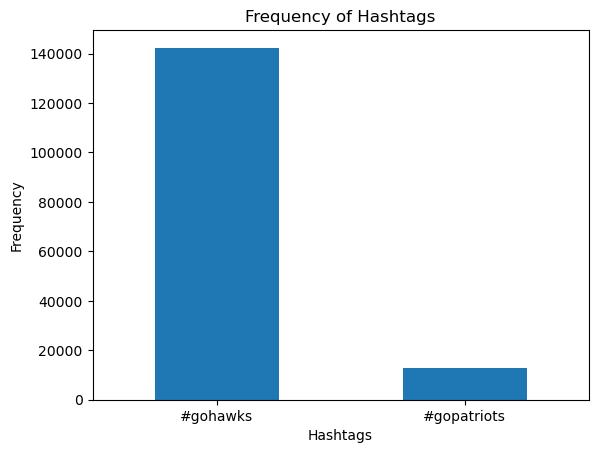

In [16]:
tweets_df = tweets_df.drop(columns=['quote_count'])

tweets_df.hashtag.value_counts().plot(kind = 'bar',rot = 0)
plt.title('Frequency of Hashtags')
plt.xlabel('Hashtags')
plt.ylabel('Frequency')

- For the location data, the data was cleaned to convert user locations to their state if it was listed as `city, state` or as a select large city in that state (like LA, Los Vegas, or Seattle for example). This was done as the two teams in the superbowl belong to opposite sides of the USA (East Vs West coast), we we may expect a lot of users in the West coast to be fans of the Seattle Seahawks. Other select locations were also cleaned; however, we can see that most fans belong to North America, which makes sense as American Football generally has a lot of American fans. Twitter location data can be very messy to use a a data input as users can arbitrarily set their location, so some may put a location they do not actually belong to or list a location that does not actually exist; therefore, it may not accurately reflect their true location, which may impact prediction accuracy. For this reason, we decided not to use it as an input variable for predicting hashtags or tweet statistics. 

In [17]:
# convert location to all lowercase
tweets_df['location'] = tweets_df['location'].str.lower() 

# list of all USA state abbreviations
state_abb = [' AL',  'AK', ' AZ', ' AR', ' CA', ' CO', ' CT', ' DE', ' FL', ' GA', ' HI', ' ID', ' IL', ' IN', ' IA', ' KS', ' KY', ' LA', 
             ' ME', ' MD', ' MA', ' MI', ' MN', ' MS', ' MO', ' MT', ' NE', ' NV', ' NH', ' NJ', ' NM', ' NY', ' NC', ' ND', ' OH', 
             ' OK', ' OR', ' PA', ' RI', ' SC', ' SD', ' TN', ' TX', ' UT', ' VT', ' VA', ' WA', ' WV', ' WI', ' WY', ' DC']
state_abb = list(map(lambda x: x.lower(), state_abb))

# dictionary of USA state name of abbreviation
states = { 'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AZ': 'Arizona', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut',
    'DC': 'District of Columbia', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'IA': 'Iowa', 'ID': 'Idaho', 'IL': 'Illinois',
    'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 
    'MN': 'Minnesota', 'MO': 'Missouri', 'MS': 'Mississippi', 'MT': 'Montana', 'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska',
    'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon',
    'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah',
    'VA': 'Virginia', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 'WV': 'West Virginia', 'WY': 'Wyoming' }
states = {v.lower(): ' '+k.lower() for k, v in states.items()}

In [18]:
# convert location data to USA state if state name or abbreviation was used
for abb in state_abb:
    tweets_df.loc[tweets_df['location'].str.contains(abb, na=False), 'location'] = abb.split()[0]
    tweets_df.loc[tweets_df['location'].str.contains(','+abb.split()[0], na=False), 'location'] = abb.split()[0]
    tweets_df.loc[tweets_df['location'].str.contains(abb.split()[0]+',', na=False), 'location'] = abb.split()[0]
    tweets_df.loc[tweets_df['location'].str.contains(abb.split()[0]+' ', na=False), 'location'] = abb.split()[0]

for state in states.keys():
    tweets_df.loc[tweets_df['location'].str.contains(state, na=False), 'location'] = states[state].split()[0]

In [32]:
# convert some cities/locations to state or country
tweets_df.loc[tweets_df['location'].isin(['us', 'america', 'merica', 'united states', 'u.s.' ,'u.s.a.', 'u.s.a', ' usa', 'usa ', 'united states of america']), 'location']= 'usa'
tweets_df.loc[tweets_df['location'].isin(['dallas', 'austin']), 'location']= 'tx'
tweets_df.loc[tweets_df['location'].isin(['atlanta']), 'location']= 'ga'
tweets_df.loc[tweets_df['location'].isin(['san diego', 'hollywood', 'sd']), 'location']= 'ca'
tweets_df.loc[tweets_df['location'].isin(['san diego', 'hollywood', 'sd']), 'location']= 'ca'
tweets_df.loc[tweets_df['location'].str.contains(' uk', na=False), 'location'] = 'uk'
tweets_df.loc[tweets_df['location'].str.contains('england', na=False), 'location'] = 'uk'
tweets_df.loc[tweets_df['location'].str.contains('london', na=False), 'location'] = 'uk'
tweets_df.loc[tweets_df['location'].str.contains('toronto', na=False), 'location'] = 'canada'
tweets_df.loc[tweets_df['location'].str.contains('vancouver', na=False), 'location'] = 'canada'
tweets_df.loc[tweets_df['location'].str.contains('los angele', na=False), 'location'] = 'ca'
tweets_df.loc[tweets_df['location'].str.contains('san francisco', na=False), 'location'] = 'ca'
tweets_df.loc[tweets_df['location'].str.contains('socal', na=False), 'location'] = 'ca'
tweets_df.loc[tweets_df['location'].str.contains('seattle', na=False), 'location'] = 'wa'
tweets_df.loc[tweets_df['location'].str.contains('tacoma', na=False), 'location'] = 'wa'
tweets_df.loc[tweets_df['location'].str.contains('spokane', na=False), 'location'] = 'wa'
tweets_df.loc[tweets_df['location'].str.contains('boston', na=False), 'location'] = 'ma'
tweets_df.loc[tweets_df['location'].str.contains('chicago', na=False), 'location'] = 'il'
tweets_df.loc[tweets_df['location'].str.contains('mexico', na=False), 'location'] = 'mexico'
tweets_df.loc[tweets_df['location'].str.contains('méxico', na=False), 'location'] = 'mexico'
tweets_df.loc[tweets_df['location'].str.contains('nyc', na=False), 'location'] = 'ny'
tweets_df.loc[tweets_df['location'].str.contains('las vegas', na=False), 'location'] = 'nv'

In [33]:
# save dataframe with cleaned locations
tweets_df.to_csv('all_tweets_edited.csv')

In [36]:
# print the top 50 locations
top_50 = tweets_df.location.value_counts().index.tolist()
print(top_50[:50])

['wa', 'ca', 'nd', 'ne', 'ma', 'ak', 'in', 'co', 'ia', 'ny', 'al', 'ar', 'or', 'canada', 'tx', 'uk', 'fl', 'ga', 'pa', 'la', 'usa', 'il', 'az', 'de', 'mi', 'va', 'id', 'oh', 'hi', 'mo', 'ks', 'nv', 'nc', 'pacific northwest', 'me', 'tn', 'ut', 'mn', 'pnw', 'wi', 'ky', 'sc', 'ri', 'dc', 'nj', 'ct', '1212', 'ok', 'mexico', 'mt']



- The distribution of users in a location is shown below with the X axis being the location where the most users live to where the least amount of users live. Again, we can see a lot of users belonging to a certain location (mainly North America) and we can see it decrease drastically. The decrease can most likely be explained by users who set their location to something that is not a real location, so that 'location' is entirely unique. Addtionally, the data cleaning technique used above may not be able to fully capture all locations that belong in the USA, Canada, Mexico, and UK (as those were the main countries that were cleaned)

Text(0.5, 1.0, 'Number of Users in Location')

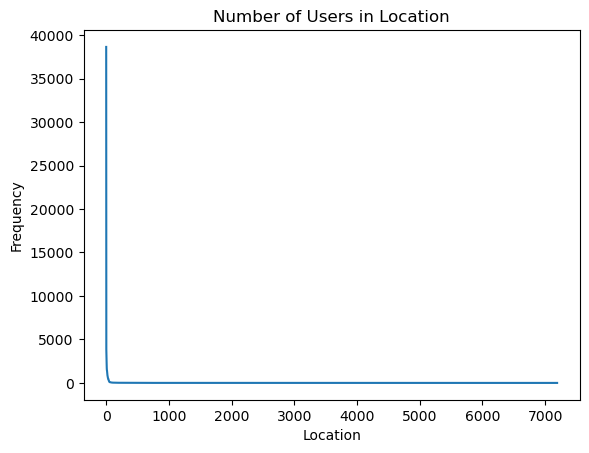

In [37]:
plt.plot(list(tweets_df.location.value_counts().sort_values(ascending=False).values))
plt.xlabel('Location')
plt.ylabel('Frequency')
plt.title('Number of Users in Location')

- ***Generate baselines for your final ML model.***
    - For this, we first used the tweet text to find what team a user is a fan of (using `#gohawks` and `#gopatriots`) and its relative post date. To start we split the data into the testing and training sets. We also cleaned the text to try to remove hyperlinks, hashtags, usermentions, numbers, and punctuations. The hashtags and user mentions were removed as it would be cheating to allow the model to see the hashtag to determine the users team and user mentions can be considered noise and they may contain the twitter account of either team. This cleaning process may not be able to clean tweets that use `gohawks` and `gopatriots` without the hashtag and may not be able to clean any mention of either team. 

In [23]:
import pandas as pd

# load data, only use tweets where #gohawks and #gopatriots are used
tweets_df = pd.read_csv('all_tweets_edited.csv')
tweets_df = tweets_df.drop(columns=['Unnamed: 0'])

In [2]:
from sklearn.model_selection import train_test_split

# split data into train and test
train, test = train_test_split(tweets_df, test_size = 0.2, random_state = 0)
print('Train data size:', train.shape)
print('Test data size:', test.shape)

Train data size: (124200, 12)
Test data size: (31051, 12)


In [3]:
import re

# clean data
def clean(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    texter = re.sub(r"<br />", " ", text)
    texter = re.sub(r"&quot;", "\"",texter)
    texter = re.sub('&#39;', "\"", texter)
    texter = re.sub('\n', " ", texter)
    texter = re.sub(' u '," you ", texter)
    texter = re.sub('`',"", texter)
    texter = re.sub(' +', ' ', texter)
    texter = re.sub(r"(!)\1+", r"!", texter)
    texter = re.sub(r"(\?)\1+", r"?", texter)
    texter = re.sub('&amp;', 'and', texter)
    texter = re.sub('\r', ' ',texter)
    clean = re.compile('<.*?>')
    texter = texter.encode('ascii', 'ignore').decode('ascii')
    texter = re.sub(clean, '', texter)
    if texter == "":
        texter = ""
    return texter

In [4]:
import string

# clean text and remove numbers and punctuation
table = str.maketrans(dict.fromkeys(string.punctuation))

def clean_text(text, table):
    new_text = text.copy()
    for i in list(text.index):
        new_text[i] = clean(text[i])
        new_text[i] = re.sub(r'(\s)#\w+','',new_text[i]) # remove hashtags
        new_text[i] = re.sub(r'(\s)@\w+','',new_text[i]) # remove mention of other users
        new_text[i] = new_text[i].translate(table)
        new_text[i] = re.sub(r'\S*\d\S*','',new_text[i])
        new_text[i] = new_text[i].lower()
    return new_text

train.text=clean_text(train.text, table)
test.text=clean_text(test.text, table)

In [5]:
train.to_csv('train2.csv') # save training data
train.head()

,citation_date,text,favorite_count,retweet_count,hashtag,ranking_score,impressions,total_retweets,replies,followers_count,location,hashtag_int
95300,1422817538,i love getting random group messages from peop...,0,0,#gohawks,4.430390,153,1,0,153,NaN,0
1180,1421277897,rodgers will be serving up veal this sunday y...,0,0,#gohawks,4.055022,680,1,0,680,at your back,0
51893,1421629210,what a game,0,0,#gohawks,4.296955,258,1,0,258,wa,0
99804,1422823881,ready for the big game,0,0,#gohawks,4.396213,14,1,0,14,ak,0
117519,1422837225,touchdown,0,0,#gohawks,4.265017,78,1,0,78,wa,0


In [6]:
test.to_csv('test2.csv') # save testing data
test.head()

,citation_date,text,favorite_count,retweet_count,hashtag,ranking_score,impressions,total_retweets,replies,followers_count,location,hashtag_int
105622,1422830703,gohawks you have to win i know you can,0,0,#gohawks,4.414219,353,1,0,353,"managua, nicaragua",0
132888,1422845557,so stressed out eating blue chips and green sk...,0,0,#gohawks,4.066595,36,1,0,36,al,0
65835,1421871408,fandom wednesday post your merchandise gear a...,0,0,#gohawks,4.084504,101,1,0,101,wa,0
57246,1421647168,it doesnt get better than this are going to th...,0,0,#gohawks,4.091457,77,1,0,77,wa,0
121010,1422838789,strategy at its finest my friends,0,0,#gohawks,4.376292,756,1,0,756,NaN,0


In [7]:
# load training and testing data
train= pd.read_csv('train2.csv')
train=train.set_index('Unnamed: 0')
test= pd.read_csv('test2.csv')
test=test.set_index('Unnamed: 0')

- In order to use the tweet to predict the hashtag used and the time it was posted, we converted each tweet into a TF-IDF matrix after lemmatizing the test with a minimum document frequency of 3. The text was converted in the TF-IDF matrix as the prediction models can only use numerical input data. 

In [5]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize, pos_tag
import nltk
from sklearn.feature_extraction.text import TfidfTransformer
import scipy.sparse

wnl = WordNetLemmatizer()

# get pos of word
def get_pos(tag):
    pos_dict = {'JJ':'a', 'NN':'n', 'RB':'r', 'VB':'v'}
    if tag[1][:2] in list(pos_dict.keys()):
        return pos_dict[tag[1][:2]]
    else:
        return 'n'
    
# lemmatize text
def lemmatize_text(text):
    tokens = nltk.word_tokenize(text)
    tags = pos_tag(tokens)
    return  [wnl.lemmatize(pair[0],get_pos(pair)) for pair in tags]

# count vectorizer on corpus
tf_vectorizer = CountVectorizer(min_df = 3, stop_words='english', analyzer = lemmatize_text)
train_vectorized = tf_vectorizer.fit_transform(train.text)
test_vectorized = tf_vectorizer.transform(test.text)

# count vector to TF-IDF
transformer = TfidfTransformer()
train_tfidf = transformer.fit_transform(train_vectorized)
scipy.sparse.save_npz('outfile12', train_tfidf) # save result

In [6]:
test_tfidf = transformer.transform(test_vectorized)
scipy.sparse.save_npz('outfile22', test_tfidf) # save result

In [46]:
import numpy as np
import pandas as pd
import scipy.sparse

# load the TF-IDF matrix of the training and testing data
train_tfidf = scipy.sparse.load_npz('outfile12.npz')
test_tfidf = scipy.sparse.load_npz('outfile22.npz')

#### Dimentionality Reduction
- For this, we reduced the dimentionality of the TF-IDF matrixes in order to try to allow the models to train faster. We decided to use the truncated SVD function rather than the Non-negative Matrix-Factorization (NMF) as the NMF data is more likely to lose data as it only considers positive matrix elements. We also decided to use `k=100` as it was able to truncate the data by a large amount while not losing a very large majority of the data based on the explained variance ratio plot. 

1
10
50
100
200
500
1000


Text(0, 0.5, 'Explained Variance Ratio')

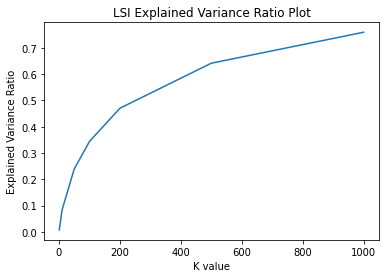

In [3]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
import matplotlib.pyplot as plt

k = [1,10,50,100,200,500,1000]
explained_var = []

for i in range(len(k)):
    print(k[i])
    reduced_svd = TruncatedSVD(n_components=k[i], random_state=0) # append truncated SVD
    reduced_svd.fit_transform(train_tfidf) # train on train tf_idf
    explained_var.append(reduced_svd.explained_variance_ratio_.sum()) # calculate explained variance ratio

# Plot variance ratio plot
plt.plot(k,explained_var)
plt.title('LSI Explained Variance Ratio Plot')
plt.xlabel('K value')
plt.ylabel('Explained Variance Ratio')

In [7]:
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from numpy import linalg
import matplotlib.pyplot as plt

# reduce dimentionality
svd100 = TruncatedSVD(n_components=100, random_state=0)
svd_train = svd100.fit_transform(train_tfidf)
svd_test = svd100.transform(test_tfidf)

#### Team Prediction
- In this part of the project, we decided to try to use the tweet text to try to predict the team hashtag a user is using in that tweet. We first converted each of the 2 hashtags into a binary number (0 or 1) to use as the target (done earlier in the notebook). Additionally, we compared the performance of various classification models to determine which had the best performance based on their accuracy. For this, we tried using Gaussian Naive Bayes classifier, Multi-Layer Perceptron classifier, and a random forest classifier. We decided to use the Gaussian Naive Bayes classifier as it was used for binary classification in the first project; while we wished to use an SVM for classification, we found that it was taking too long to run. Additionally, we used the MLP and random forest classifiers as their regression counterpart worked well in the Regression portion of this project. 
- The MLP and random forest classifiers had competitive accuracies of about 92% while the Gaussian Naive Bayes (GNB) classifier only achieved an accuracy of about 84%. While the GNB classifier did have a worse accuracy compared to the other 2 models, it was able to more accurately predict tweets that used `#gopatriots`. The MLP model was less successful in predicting that tweet correctly and the random forest classifer slightly less successful than the MLP model. Each model was most likely more able to correctly predict `#gohawks` tweets as there were much more tweets that used that hashtag than `#gopatriots`. More data preprocessing, using more `#gopatriots` tweets (if they were available), or using more regularization techniques can help to increase the model performance. 

GaussianNB Classification: 
Accuracy:  0.844803710025442
Recall:  0.2857142857142857
Precision:  0.20162162162162162
F-1 Score:  0.2364126128981144


Text(0.5, 1.0, 'GaussianNB Classification: Confusion Matrix')

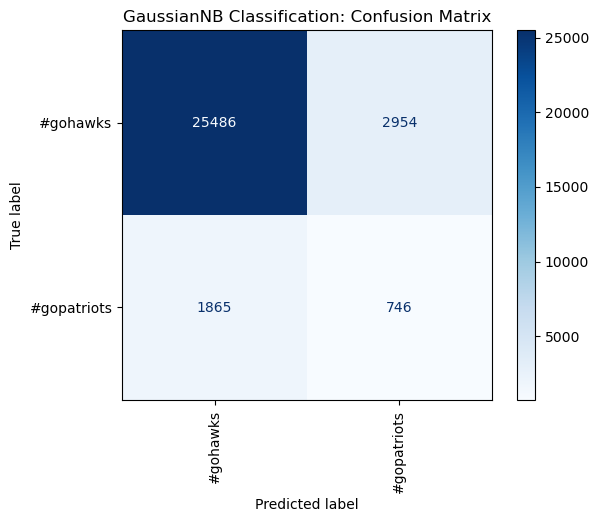

In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt

labels = ['#gohawks', '#gopatriots']

clf = GaussianNB()
clf.fit(svd_train, train['hashtag_int'])

print('GaussianNB Classification: ')
predict=clf.predict(svd_test) # get svm metrics
print('Accuracy: ', metrics.accuracy_score(test['hashtag_int'], predict))
print('Recall: ', metrics.recall_score(test['hashtag_int'], predict))
print('Precision: ', metrics.precision_score(test['hashtag_int'], predict))
print('F-1 Score: ', metrics.f1_score(test['hashtag_int'], predict))
conf_matrix = metrics.confusion_matrix(test['hashtag_int'], predict) # plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('GaussianNB Classification: Confusion Matrix')

In [18]:
from sklearn.neural_network import MLPClassifier

print('MLP Classification: ')
for i in range(100,600,100):
    print('Fitting with', i, 'hidden neurons at a depth of 3 ...')
    clf = MLPClassifier(hidden_layer_sizes=(i,i,i),random_state=1, max_iter=300, early_stopping = True, warm_start = True).fit(svd_train, train['hashtag_int'])
    predict=clf.predict(svd_test) # get MLP metrics
    print('Accuracy: ', metrics.accuracy_score(test['hashtag_int'], predict))

MLP Classification: 
Fitting with 100 hidden neurons at a depth of 3 ...
Accuracy:  0.9184889375543461
Fitting with 200 hidden neurons at a depth of 3 ...
Accuracy:  0.919487295095166
Fitting with 300 hidden neurons at a depth of 3 ...
Accuracy:  0.9200991916524428
Fitting with 400 hidden neurons at a depth of 3 ...
Accuracy:  0.9193584747673182
Fitting with 500 hidden neurons at a depth of 3 ...
Accuracy:  0.9196161154230138


Fitting...
MLP Classification: 
Accuracy:  0.9200991916524428
Recall:  0.5356775079575161
Precision:  0.8386794500640338
F-1 Score:  0.5460744032291266


Text(0.5, 1.0, 'MLP Classification: Confusion Matrix')

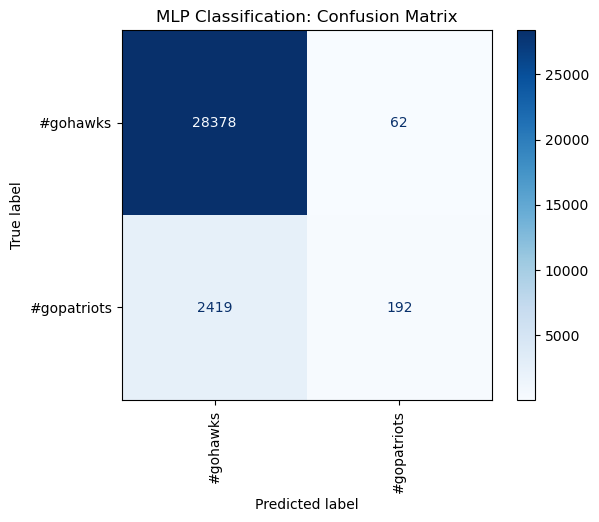

In [19]:
print('Fitting...')
clf = MLPClassifier(hidden_layer_sizes=(300,300,300),random_state=1, max_iter=300, early_stopping = True, warm_start = True).fit(svd_train, train['hashtag_int'])

print('MLP Classification: ')
predict=clf.predict(svd_test) # mlp svm metrics
print('Accuracy: ', metrics.accuracy_score(test['hashtag_int'], predict))
print('Recall: ', metrics.recall_score(test['hashtag_int'], predict, average='macro'))
print('Precision: ', metrics.precision_score(test['hashtag_int'], predict, average='macro'))
print('F-1 Score: ', metrics.f1_score(test['hashtag_int'], predict, average='macro'))
conf_matrix = metrics.confusion_matrix(test['hashtag_int'], predict) # plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('MLP Classification: Confusion Matrix')

In [50]:
from sklearn.ensemble import RandomForestClassifier

for i in range(1,51,10):
    regr = RandomForestClassifier(max_depth=i, random_state=0, n_jobs=-1, max_features = 'auto', oob_score=True)
    regr.fit(svd_train, train['hashtag_int'])

    print('Random Forest Classification with a max depth of', i, ': ')
    predict=regr.predict(svd_test) # get svm metrics
    print('Accuracy: ', metrics.accuracy_score(test['hashtag_int'], predict))

Random Forest Classification with a max depth of 1 : 
Accuracy:  0.9159125309973913
Random Forest Classification with a max depth of 11 : 
Accuracy:  0.9190686290296609
Random Forest Classification with a max depth of 21 : 
Accuracy:  0.9205500627999098
Random Forest Classification with a max depth of 31 : 
Accuracy:  0.9198415509967472
Random Forest Classification with a max depth of 41 : 
Accuracy:  0.9197771408328235


Random Forest Classification: 
Accuracy:  0.9205500627999098
Recall:  0.534880140334547
Precision:  0.8685572291368202
F-1 Score:  0.5447020281536521


Text(0.5, 1.0, 'Random Forest Classification: Confusion Matrix')

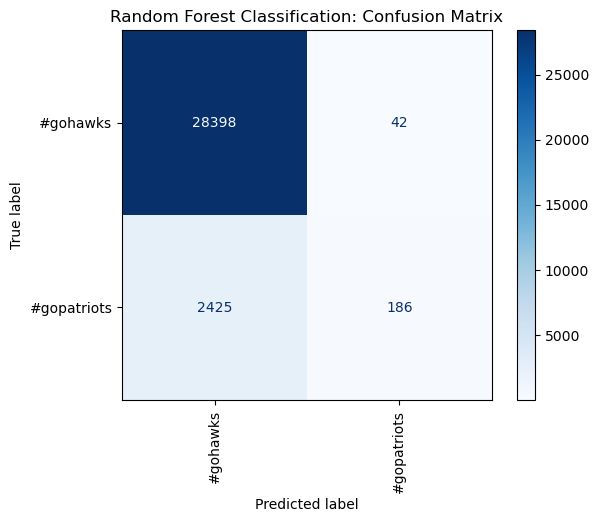

In [51]:
regr = RandomForestClassifier(max_depth=21, random_state=0, n_jobs=-1, max_features = 'auto', oob_score=True)
regr.fit(svd_train, train['hashtag_int'])

print('Random Forest Classification: ')
predict=regr.predict(svd_test) # get RFC metrics
print('Accuracy: ', metrics.accuracy_score(test['hashtag_int'], predict))
print('Recall: ', metrics.recall_score(test['hashtag_int'], predict, average='macro'))
print('Precision: ', metrics.precision_score(test['hashtag_int'], predict, average='macro'))
print('F-1 Score: ', metrics.f1_score(test['hashtag_int'], predict, average='macro'))
conf_matrix = metrics.confusion_matrix(test['hashtag_int'], predict) # plot confusion matrix
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=labels)
disp.plot(cmap=plt.cm.Blues, xticks_rotation='vertical')
plt.title('Random Forest Classification: Confusion Matrix')

#### Tweet Timestamp Prediction
- For predicting the time at which a tweet was posted, we decided to approach this in 2 different ways. Since the dataset originally has the time posted in seconds, we approached this as a regression task in the first half and a categorical classification task in the second half. Additionally, we compared the performance of various regression or classification models to determine which had the best performance based on their $R^2$ value or accuracy. 

##### Regression Prediction of Time Posted
- For this portion of the project, we converted the time at which each tweet posted to be the amount of hours after the first tweet was posted. So the very first tweet will be 0 hours and a tweet posted 1 hour after will be 1 hours. For this, we tried using a multi-layer perceptron neural network and a random forest regression to try to predict when the tweet was posted. For the MLP model, it performed relatively poorly with $R^2$ values between 0.11 and 0.13 and an RMSE of around 150. This implies the model was not able to very accurately predict the time in which the tweet was posted used the various models shown below. With the random forest regression, we changed the maximum depth of the tree; however, all the models we tried had the same $R^2$ values of about 0.115 and RMSE value. This implies that the forest regression algorithm was not able to very accurately predict the time in which the tweet was posted. While both models had poor performances, its architecture could have been more optimized, especially for the MLP model with a different depth and hidden layers, due to the time constraint, we only tested the models shown below. 

In [ ]:
test_all_tweet_times = pd.to_datetime(test.citation_date, unit='s')
train_all_tweet_times = pd.to_datetime(train.citation_date, unit='s')

hour_posted = []
test_min = min(test_all_tweet_times)
hour_posted = test_all_tweet_times-test_min
for i in list(test.index):
    hour_posted[i] = hour_posted[i].total_seconds()/60/60
test['hour_posted']= hour_posted

In [ ]:
hour_posted = []
train_min = min(train_all_tweet_times)
hour_posted = train_all_tweet_times-train_min
for i in list(train.index):
    hour_posted[i] = hour_posted[i].total_seconds()/60/60
train['hour_posted']= hour_posted

In [ ]:
from sklearn.neural_network import MLPRegressor

for i in range(500,1100,100):
    print('\nFitting with depth of 3 and', i, 'hidden neurons ...')
    clf = MLPRegressor(hidden_layer_sizes=(i,i,i),random_state=1, max_iter=300, early_stopping = True, warm_start = True).fit(svd_train, train['hour_posted'])

    print('MLP Regression: ')
    print('R^2 Value: ', clf.score(svd_test, test['hour_posted']))
    print('Root Mean Squared Error: ', metrics.mean_squared_error(test['hour_posted'], clf.predict(svd_test), squared = False))


Fitting with depth of 3 and 500 hidden neurons ...
MLP Regression: 
R^2 Value:  0.11535911981009217
Root Mean Squared Error:  150.22484089231617

Fitting with depth of 3 and 600 hidden neurons ...
MLP Regression: 
R^2 Value:  0.12032058065887696
Root Mean Squared Error:  149.80298459643413

Fitting with depth of 3 and 700 hidden neurons ...
MLP Regression: 
R^2 Value:  0.11768383544067662
Root Mean Squared Error:  150.02732584539982

Fitting with depth of 3 and 800 hidden neurons ...
MLP Regression: 
R^2 Value:  0.1210288500475597
Root Mean Squared Error:  149.74266589894356

Fitting with depth of 3 and 900 hidden neurons ...
MLP Regression: 
R^2 Value:  0.11451760881390993
Root Mean Squared Error:  150.29627428946665

Fitting with depth of 3 and 1000 hidden neurons ...
MLP Regression: 
R^2 Value:  0.12056291220552295
Root Mean Squared Error:  149.78234952836988


In [ ]:
from sklearn.ensemble import RandomForestRegressor

for i in range(100,700,100):
    print('\nMax Depth:', i)
    regr = RandomForestRegressor(max_depth=i, random_state=0, n_jobs=-1, max_features = 'auto', oob_score=True)
    regr.fit(svd_train, train['hour_posted'])

    print('Random Forest Regression: ')
    print('R^2 Value: ', regr.score(svd_test, test['hour_posted']))
    print('Root Mean Squared Error: ', metrics.mean_squared_error(test['hour_posted'], regr.predict(svd_test), squared = False))


Max Depth: 100
Random Forest Regression: 
R^2 Value:  0.11483873853484983
Root Mean Squared Error:  150.26901853722683

Max Depth: 200
Random Forest Regression: 
R^2 Value:  0.11483873853484983
Root Mean Squared Error:  150.26901853722683

Max Depth: 300
Random Forest Regression: 
R^2 Value:  0.11483873853484983
Root Mean Squared Error:  150.26901853722683

Max Depth: 400
Random Forest Regression: 
R^2 Value:  0.11483873853484983
Root Mean Squared Error:  150.26901853722683

Max Depth: 500
Random Forest Regression: 
R^2 Value:  0.11483873853484983
Root Mean Squared Error:  150.26901853722683

Max Depth: 600
Random Forest Regression: 
R^2 Value:  0.11483873853484983
Root Mean Squared Error:  150.26901853722683


##### Classification Prediction of Time Posted
- For the classification approach of predicting when the tweet was posted, we attempted the class prediction in 2 different way. In the first way, we converted each of the time stamp to the month, day, and the hour it was posted; any time before 12pm was listed as 12 am and any time after 12pm was listed as 12pm. In the second way, we converted the timestamp to the month and the day the tweet was posted. We used these 2 methods to see whether a particular method could achieve better performance. Additionally, we did not display a confusion matrix for this portion of the project due to the number of classes each method created. 
- For using the month, day, and hour classification of the time the tweet was posted, we tested 3 different algorithms: multinomial Naive Bayes classifier, MLP classifier, and random forest classifier. For the MLP model, we tested it with a depth of 3 and various amounts of hidden layers; for the random forest, we used several differnt depths. The MLP and random forest classifiers had competitive performances with their best model achieving an accuracy of about 34-35%; however, the Native Bayes model was only able to achieve an accuracy of about 24%. 
    - For the MLP model, it appears the number of hidden layers did not affect the accuracy of the model very much. While we could have also tested it using different depths, we were not able to do so due to time. Additionally, it appears increasing the maximum depth of the tree above 200 in the random forest model had little impact on the model performance. 

In [ ]:
test.citation_date = pd.to_datetime(test.citation_date, unit='s')
train.citation_date = pd.to_datetime(train.citation_date, unit='s')

In [ ]:
all_tweet_times = []
for i in list(test.index):
    tweet_time = (test['citation_date'][i])
    tweet_time = tweet_time.strftime('%m-%d-%H')
    tweet_time = tweet_time.split('-')
    if int(tweet_time[-1])<12:
        tweet_time[-1]='00'
    else:
        tweet_time[-1]='12'
    all_tweet_times.append('-'.join(tweet_time))
test['approx_citation_date']=all_tweet_times # month day hour

In [ ]:
all_tweet_times = []
for i in list(train.index):
    tweet_time = (train['citation_date'][i])
    tweet_time = tweet_time.strftime('%m-%d-%H')
    tweet_time = tweet_time.split('-')
    if int(tweet_time[-1])<12:
        tweet_time[-1]='00'
    else:
        tweet_time[-1]='12'
    all_tweet_times.append('-'.join(tweet_time))
train['approx_citation_date']=all_tweet_times # month day hour

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
import matplotlib.pyplot as plt

train['citation_int'] = train['approx_citation_date'].astype('category').cat.codes
test['citation_int'] = test['approx_citation_date'].astype('category').cat.codes

labels = list(train['approx_citation_date'].astype('category').cat.categories)

clf = MultinomialNB()

minmax = MinMaxScaler()

clf.fit(minmax.fit_transform(svd_train), train['citation_int'])


print('GaussianNB Classification: ')
predict=clf.predict(minmax.fit_transform(svd_test)) # get svm metrics
print('Accuracy: ', metrics.accuracy_score(test['citation_int'], predict))
print('Recall: ', metrics.recall_score(test['citation_int'], predict, average='macro'))
print('Precision: ', metrics.precision_score(test['citation_int'], predict, average='macro'))
print('F-1 Score: ', metrics.f1_score(test['citation_int'], predict, average='macro'))

GaussianNB Classification: 
Accuracy:  0.23825319635438472
Recall:  0.02040816326530612
Precision:  0.004862310129681321
F-1 Score:  0.007853499016189482


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.neural_network import MLPClassifier

for i in range(100,700,100):
    print('\nFitting with depth of 3 and', i, 'hidden neurons ...')
    clf = MLPClassifier(hidden_layer_sizes=(i,i,i),random_state=1, max_iter=300, early_stopping = True, warm_start = True).fit(svd_train, train['citation_int'])

    print('MLP Classification: ')
    predict=clf.predict(svd_test) # get svm metrics
    print('Accuracy: ', metrics.accuracy_score(test['citation_int'], predict))
    print('Recall: ', metrics.recall_score(test['citation_int'], predict, average='macro'))
    print('Precision: ', metrics.precision_score(test['citation_int'], predict, average='macro'))
    print('F-1 Score: ', metrics.f1_score(test['citation_int'], predict, average='macro'))


Fitting with depth of 3 and 100 hidden neurons ...
MLP Classification: 
Accuracy:  0.34481981256642297
Recall:  0.0512481764811195


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Precision:  0.09865670643134111
F-1 Score:  0.051744880506046524

Fitting with depth of 3 and 200 hidden neurons ...
MLP Classification: 
Accuracy:  0.33969920453447555
Recall:  0.05643278648893357
Precision:  0.12310573963359842
F-1 Score:  0.06305321319766238

Fitting with depth of 3 and 300 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.34372483977971724
Recall:  0.052701497259503266
Precision:  0.13188367002073642
F-1 Score:  0.05539226093559236

Fitting with depth of 3 and 400 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.34787929535280665
Recall:  0.054299636981462826
Precision:  0.12323830240088732
F-1 Score:  0.05791805033553808

Fitting with depth of 3 and 500 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.3439502753534508
Recall:  0.05909918648958483
Precision:  0.12986399302330115
F-1 Score:  0.06542022830510648

Fitting with depth of 3 and 600 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.34681652764806287
Recall:  0.05722431053235221
Precision:  0.1364053485804642
F-1 Score:  0.060856655176168076


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

for i in range(10,700,100):
    print('\nMax Depth:', i)
    regr = RandomForestClassifier(max_depth=i, random_state=0, n_jobs=-1, max_features = 'auto', oob_score=True)
    regr.fit(svd_train, train['citation_int'])

    print('Random Forest Classification: ')
    predict=regr.predict(svd_test) # get svm metrics
    print('Accuracy: ', metrics.accuracy_score(test['citation_int'], predict))
    print('Recall: ', metrics.recall_score(test['citation_int'], predict, average='macro'))
    print('Precision: ', metrics.precision_score(test['citation_int'], predict, average='macro'))
    print('F-1 Score: ', metrics.f1_score(test['citation_int'], predict, average='macro'))


Max Depth: 10
Random Forest Classification: 
Accuracy:  0.3074297124086181
Recall:  0.032587589448926785
Precision:  0.16277745681414918
F-1 Score:  0.029768215962567315

Max Depth: 110


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3440790956812985
Recall:  0.0719888799701266
Precision:  0.26109050887598517
F-1 Score:  0.09314943470321826

Max Depth: 210


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3440790956812985
Recall:  0.0719888799701266
Precision:  0.26108977751759826
F-1 Score:  0.09314915815747968

Max Depth: 310


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3440790956812985
Recall:  0.0719888799701266
Precision:  0.26108977751759826
F-1 Score:  0.09314915815747968

Max Depth: 410


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3440790956812985
Recall:  0.0719888799701266
Precision:  0.26108977751759826
F-1 Score:  0.09314915815747968

Max Depth: 510


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3440790956812985
Recall:  0.0719888799701266
Precision:  0.26108977751759826
F-1 Score:  0.09314915815747968

Max Depth: 610


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3440790956812985
Recall:  0.0719888799701266
Precision:  0.26109050887598517
F-1 Score:  0.09314943470321826


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- For using the month and day classification of the time the tweet was posted, we tested 3 different algorithms: multinomial Naive Bayes classifier, MLP classifier, and random forest classifier. For the MLP model, we tested it with a depth of 3 and various amounts of hidden layers; for the random forest, we used several differnt depths. The MLP and random forest classifiers had competitive performances with their best model achieving an accuracy of about 36%; however, the Native Bayes model was only able to achieve an accuracy of about 25%. While the categories presented to the models were more general, the models still had trouble being able to correctly classify when the tweet was posted. 
    - For the MLP model, it appears the number of hidden layers did not affect the accuracy of the model very much. While we could have also tested it using different depths, we were not able to do so due to time. Additionally, it appears increasing the maximum depth of the tree above 100 in the random forest model had little impact on the model performance. 

In [ ]:
all_tweet_times = []
for i in list(train.index):
    tweet_time = (train['approx_citation_date'][i])
    tweet_time = tweet_time.split('-')
    all_tweet_times.append('-'.join(tweet_time[:2]))
train['approx_citation_day']=all_tweet_times # month day

In [ ]:
all_tweet_times = []
for i in list(test.index):
    tweet_time = (test['approx_citation_date'][i])
    tweet_time = tweet_time.split('-')
    all_tweet_times.append('-'.join(tweet_time[:2]))
test['approx_citation_day']=all_tweet_times # month day

In [ ]:
train['citation_day_int'] = train['approx_citation_day'].astype('category').cat.codes
test['citation_day_int'] = test['approx_citation_day'].astype('category').cat.codes

labels = list(train['approx_citation_day'].astype('category').cat.categories)

clf = MultinomialNB()

minmax = MinMaxScaler()

clf.fit(minmax.fit_transform(svd_train), train['citation_day_int'])


print('GaussianNB Classification: ')
predict=clf.predict(minmax.fit_transform(svd_test)) # get svm metrics
print('Accuracy: ', metrics.accuracy_score(test['citation_day_int'], predict))
print('Recall: ', metrics.recall_score(test['citation_day_int'], predict, average='macro'))
print('Precision: ', metrics.precision_score(test['citation_day_int'], predict, average='macro'))
print('F-1 Score: ', metrics.f1_score(test['citation_day_int'], predict, average='macro'))

GaussianNB Classification: 
Accuracy:  0.2529065086470645
Recall:  0.04
Precision:  0.01011626034588258
F-1 Score:  0.016148468023853585


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
for i in range(100,700,100):
    print('\nFitting with depth of 3 and', i, 'hidden neurons ...')
    clf = MLPClassifier(hidden_layer_sizes=(i,i,i),random_state=1, max_iter=300, early_stopping = True, warm_start = True).fit(svd_train, train['citation_day_int'])

    print('MLP Classification: ')
    predict=clf.predict(svd_test) # get svm metrics
    print('Accuracy: ', metrics.accuracy_score(test['citation_day_int'], predict))
    print('Recall: ', metrics.recall_score(test['citation_day_int'], predict, average='macro'))
    print('Precision: ', metrics.precision_score(test['citation_day_int'], predict, average='macro'))
    print('F-1 Score: ', metrics.f1_score(test['citation_day_int'], predict, average='macro'))


Fitting with depth of 3 and 100 hidden neurons ...
MLP Classification: 
Accuracy:  0.36169527551447617
Recall:  0.0884536507068368
Precision:  0.162934483003855
F-1 Score:  0.09102841345234734

Fitting with depth of 3 and 200 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.35789507584296804
Recall:  0.09636844458541916
Precision:  0.180152998075163
F-1 Score:  0.10029395100526065

Fitting with depth of 3 and 300 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.3620173263340955
Recall:  0.09071932593353008
Precision:  0.17625569819219453
F-1 Score:  0.09356956066420548

Fitting with depth of 3 and 400 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.36089014846542783
Recall:  0.08639603580761196
Precision:  0.14984445093178905
F-1 Score:  0.08579926151668196

Fitting with depth of 3 and 500 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.3638852210878877
Recall:  0.09573767134821405
Precision:  0.1957574676388248
F-1 Score:  0.10219748933662803

Fitting with depth of 3 and 600 hidden neurons ...


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


MLP Classification: 
Accuracy:  0.3603748671540369
Recall:  0.0926718795547532
Precision:  0.21964194586776792
F-1 Score:  0.09713453249749536


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.ensemble import RandomForestClassifier

for i in range(10,700,100):
    print('\nMax Depth:', i)
    regr = RandomForestClassifier(max_depth=i, random_state=0, n_jobs=-1, max_features = 'auto', oob_score=True)
    regr.fit(svd_train, train['citation_day_int'])

    print('Random Forest Classification: ')
    predict=regr.predict(svd_test) # get svm metrics
    print('Accuracy: ', metrics.accuracy_score(test['citation_day_int'], predict))
    print('Recall: ', metrics.recall_score(test['citation_day_int'], predict, average='macro'))
    print('Precision: ', metrics.precision_score(test['citation_day_int'], predict, average='macro'))
    print('F-1 Score: ', metrics.f1_score(test['citation_day_int'], predict, average='macro'))


Max Depth: 10
Random Forest Classification: 
Accuracy:  0.3223728704389553
Recall:  0.05944972207200935
Precision:  0.26088041406960655
F-1 Score:  0.05173192855913349

Max Depth: 110


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3623715822356768
Recall:  0.10463470787058293
Precision:  0.3138423735719511
F-1 Score:  0.12369246994266518

Max Depth: 210


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3624037873176387
Recall:  0.10464930108473836
Precision:  0.3138807969334701
F-1 Score:  0.12371486162099324

Max Depth: 310


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3624037873176387
Recall:  0.10464930108473836
Precision:  0.3138807969334701
F-1 Score:  0.12371486162099324

Max Depth: 410


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3623715822356768
Recall:  0.10463470787058293
Precision:  0.3138431486779633
F-1 Score:  0.12369270133255746

Max Depth: 510


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3623715822356768
Recall:  0.10463470787058293
Precision:  0.3138431486779633
F-1 Score:  0.12369270133255746

Max Depth: 610


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Random Forest Classification: 
Accuracy:  0.3623715822356768
Recall:  0.10463470787058293
Precision:  0.3138431486779633
F-1 Score:  0.12369270133255746


c:\Users\Meimei\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


- Overall, from the low $R^2$ values and high RMSE scores from the regression task and the low accuracy from the classification task, the models we used were generally unable to correctly predict the time the tweet was posted based on the tweet text. This poor performance does make sense; when looking at some of the tweets, it appears that some of the tweets do not seem to actually be talking about the Superbowl or game events. There might be a lot of "noisy" tweets in the data, which can contribute to the poor model performance. 

#### Likes, Retweets, and Replies Prediction
- For predicting the number of likes, retweets (both total retweets and regular retweets), and replies, we decided to use regression algorithms to do so. For this, we used the number of likes, retweets, total retweets, number of replies, impressions, ranking score, and user follower count (withholding the target feature) for the prediction input. Since the actual tweet text, tweet timestamp, and location are less important for tweet likes, retweets, and replies, we decided to not use them in this portion of the project; this is because users with a lot of followers are much more likely to have more interactions with their tweets than users with little followers no matter the tweet text. Additionally, since the numerical data was so highly skewed, we also normalised the data. 

In [42]:
tweets_stats_df = tweets_df.drop(columns=['location', 'hashtag', 'text', 'citation_date'])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

def Prediction(scaler, new_df, target, model, model_name):
    X = new_df.drop(target, axis=1)
    Y = new_df[target]
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 0)
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    print('\n', model_name, ":")
    print("For ", target, ", R^2 = ", model.score(X_test, y_test))
    print('Root Mean Squared Error: ', metrics.mean_squared_error(y_test, model.predict(X_test), squared = False))

- We initially tried predicting the target values with a linear regression model; however, it appears it was only able to slightly model the number of replies a tweet recieved based on the $R^2$ value; it worked best with predicting the number of replies a tweet recieved as it had the highest $R^2$ value and lowest RMSE. Interestingly, the number of favourites a tweet recieved had the lowest $R^2$ value but the total number of retweets had the largest RMSE score. The low model performance can likely be attributed to the fact that there is no real linear relationship between number of likes/retweets/replies/impressions/ranking score. 

In [67]:
# Target: likes
Prediction(scaler, tweets_stats_df, 'favorite_count', LinearRegression(), 'Linear Regression')
# Target: Replies
Prediction(scaler, tweets_stats_df, 'replies', LinearRegression(), 'Linear Regression')
# Target: Retweets
Prediction(scaler, tweets_stats_df, 'retweet_count', LinearRegression(), 'Linear Regression')
# Target: Total Retweets
Prediction(scaler, tweets_stats_df, 'total_retweets', LinearRegression(), 'Linear Regression')


 Linear Regression :
For  favorite_count , R^2 =  -16.110423894164644
Root Mean Squared Error:  12.954052647291842

 Linear Regression :
For  replies , R^2 =  0.31541412187031115
Root Mean Squared Error:  0.3355881358657905

 Linear Regression :
For  retweet_count , R^2 =  -23.220388218784304
Root Mean Squared Error:  13.154062032272337

 Linear Regression :
For  total_retweets , R^2 =  0.11585529999111255
Root Mean Squared Error:  37.96087737442812


- Next, we attempted to predict the target values using a multilayer perceptron algorithm using various hidden layers. By using 3 hidden layers of 300, the MLP model achieved an $R^2$ value of about 0.67 for the number of favourites a tweet recieves. For the number of replies, using 3 hidden layers of 100 achieved an $R^2$ value of 0.675. For the number of retweets, using 3 hidden layers of 100 achieved an $R^2$ value of 0.819; on the other hand, for predicting the total number of retweets a tweet could recieve, it only achieved and $R^2$ value of 0.447 at best. The performance discrepancy between the number of retweets and total number of retweet prediction seems to be an odd occurence throughout this portion. 

In [49]:
# Target: likes
for i in range(100,600,100):
    print('\nusing', i, 'hidden layers with a depth of 3...')
    model = MLPRegressor(random_state=0, activation= 'relu', solver = 'adam', 
                            hidden_layer_sizes=(i,i,i), max_iter=400, warm_start = True, early_stopping=True)
    Prediction(scaler, tweets_stats_df, 'favorite_count', model,'MLP Regression')


using 100 hidden layers with a depth of 3...

 MLP Regression :
For  favorite_count , R^2 =  -1.6624053442766535
Root Mean Squared Error:  5.109899533623932

using 200 hidden layers with a depth of 3...

 MLP Regression :
For  favorite_count , R^2 =  0.4798927443657345
Root Mean Squared Error:  2.258508500494102

using 300 hidden layers with a depth of 3...

 MLP Regression :
For  favorite_count , R^2 =  0.6707562600212799
Root Mean Squared Error:  1.796941904372506

using 400 hidden layers with a depth of 3...

 MLP Regression :
For  favorite_count , R^2 =  -0.19741609333576493
Root Mean Squared Error:  3.4268714924387322

using 500 hidden layers with a depth of 3...

 MLP Regression :
For  favorite_count , R^2 =  -3.2239921172066426
Root Mean Squared Error:  6.436308065093253


In [51]:
# Target: Replies
for i in range(100,600,100):
    print('\nusing', i, 'hidden layers with a depth of 3...')
    model = MLPRegressor(random_state=0, activation= 'relu', solver = 'adam', 
                            hidden_layer_sizes=(i,i,i), max_iter=400, warm_start = True, early_stopping=True)
    Prediction(scaler, tweets_stats_df, 'replies', model,'MLP Regression')


using 100 hidden layers with a depth of 3...

 MLP Regression :
For  replies , R^2 =  0.6750535615565146
Root Mean Squared Error:  0.23120569178770756

using 200 hidden layers with a depth of 3...

 MLP Regression :
For  replies , R^2 =  0.09418696213890165
Root Mean Squared Error:  0.3860218736554152

using 300 hidden layers with a depth of 3...

 MLP Regression :
For  replies , R^2 =  0.5174523234127204
Root Mean Squared Error:  0.2817492347098851

using 400 hidden layers with a depth of 3...

 MLP Regression :
For  replies , R^2 =  0.06418941814109491
Root Mean Squared Error:  0.3923616990689427

using 500 hidden layers with a depth of 3...

 MLP Regression :
For  replies , R^2 =  0.053949626621751734
Root Mean Squared Error:  0.3945025014981449


In [52]:
# Target: Retweets
for i in range(100,600,100):
    print('\nusing', i, 'hidden layers with a depth of 3...')
    model = MLPRegressor(random_state=0, activation= 'relu', solver = 'adam', 
                            hidden_layer_sizes=(i,i,i), max_iter=400, warm_start = True, early_stopping=True)
    Prediction(scaler, tweets_stats_df, 'retweet_count', model,'MLP Regression')


using 100 hidden layers with a depth of 3...

 MLP Regression :
For  retweet_count , R^2 =  0.8193141531908624
Root Mean Squared Error:  1.1361388306884281

using 200 hidden layers with a depth of 3...

 MLP Regression :
For  retweet_count , R^2 =  -1.5527427737069672
Root Mean Squared Error:  4.270442349576531

using 300 hidden layers with a depth of 3...

 MLP Regression :
For  retweet_count , R^2 =  0.42920593011304053
Root Mean Squared Error:  2.0193382041247547

using 400 hidden layers with a depth of 3...

 MLP Regression :
For  retweet_count , R^2 =  0.7307742026727364
Root Mean Squared Error:  1.3868441901991269

using 500 hidden layers with a depth of 3...

 MLP Regression :
For  retweet_count , R^2 =  0.7148831795528636
Root Mean Squared Error:  1.4271865861711248


In [53]:
# Target: Total Retweets
for i in range(100,600,100):
    print('\nusing', i, 'hidden layers with a depth of 3...')
    model = MLPRegressor(random_state=0, activation= 'relu', solver = 'adam', 
                            hidden_layer_sizes=(i,i,i), max_iter=400, warm_start = True, early_stopping=True)
    Prediction(scaler, tweets_stats_df, 'total_retweets', model,'MLP Regression')


using 100 hidden layers with a depth of 3...

 MLP Regression :
For  total_retweets , R^2 =  0.13891207636095082
Root Mean Squared Error:  37.462634643295026

using 200 hidden layers with a depth of 3...

 MLP Regression :
For  total_retweets , R^2 =  0.13618110144144635
Root Mean Squared Error:  37.52199473970426

using 300 hidden layers with a depth of 3...

 MLP Regression :
For  total_retweets , R^2 =  0.0678529733477744
Root Mean Squared Error:  38.97775100031986

using 400 hidden layers with a depth of 3...

 MLP Regression :
For  total_retweets , R^2 =  0.4473077886469353
Root Mean Squared Error:  30.01347211795713

using 500 hidden layers with a depth of 3...

 MLP Regression :
For  total_retweets , R^2 =  0.15449239639187684
Root Mean Squared Error:  37.12216753104902


- We also tried using K Nearest Neighbours to try to predict the target features as we thought the data would naturally cluster together for these features; however, the model performance may be impacted by the fact the data was very dimensional. The $R^2$ value and RMSE of each of the target features are shown below. For both the number of favourites and retweets, using 1 neighbour to predict their value performed the best; for the number of replies and total number of retweets, 5 neighbours performed the best. 

In [62]:
from sklearn.neighbors import KNeighborsRegressor

for i in range(1,10,2):
    print('\nKNN with', i, 'Neighbours')
    model = KNeighborsRegressor(n_neighbors=i)
    # Target: likes
    Prediction(scaler, tweets_stats_df, 'favorite_count', model, 'KNN Regression')
    # Target: Replies
    Prediction(scaler, tweets_stats_df, 'replies', model, 'KNN Regression')
    # Target: Retweets
    Prediction(scaler, tweets_stats_df, 'retweet_count', model, 'KNN Regression')
    # Target: Total Retweets
    Prediction(scaler, tweets_stats_df, 'total_retweets', model, 'KNN Regression')


KNN with 1 Neighbours

 KNN Regression :
For  favorite_count , R^2 =  0.5213209182645344
Root Mean Squared Error:  2.1666935871650495

 KNN Regression :
For  replies , R^2 =  0.0698545804882087
Root Mean Squared Error:  0.3911722665888384

 KNN Regression :
For  retweet_count , R^2 =  0.854197029006574
Root Mean Squared Error:  1.0205928521807552

 KNN Regression :
For  total_retweets , R^2 =  0.014112474576936762
Root Mean Squared Error:  40.085587524176646

KNN with 3 Neighbours

 KNN Regression :
For  favorite_count , R^2 =  0.2738844446462757
Root Mean Squared Error:  2.6685671994876405

 KNN Regression :
For  replies , R^2 =  0.010583934497354175
Root Mean Squared Error:  0.4034429303357358

 KNN Regression :
For  retweet_count , R^2 =  -6.808088266565511
Root Mean Squared Error:  7.468642861551237

 KNN Regression :
For  total_retweets , R^2 =  0.05979242342776958
Root Mean Squared Error:  39.14591429071724

KNN with 5 Neighbours

 KNN Regression :
For  favorite_count , R^2 =  0

- Finally, we used a Random forest regressor to try to predict the target values; their $R^2$ value and RMSE are shown below. In general, it appears the random forest performed the worst predict the number of favourites and retweets a tweet recived based on their low $R^2$ value and high RMSE. It performed a little better on the number of replies and performed the best predict the total number of retweets. 

In [63]:
from sklearn.ensemble import RandomForestRegressor

for i in range(4,15,2):
    print('\nRandom Forest with a depth of', i)
    model = RandomForestRegressor(max_depth=i, random_state=0)
    # Target: likes
    Prediction(scaler, tweets_stats_df, 'favorite_count', model, 'Random Forest Regression')
    # Target: Replies
    Prediction(scaler, tweets_stats_df, 'replies', model, 'Random Forest Regression')
    # Target: Retweets
    Prediction(scaler, tweets_stats_df, 'retweet_count', model, 'Random Forest Regression')
    # Target: Total Retweets
    Prediction(scaler, tweets_stats_df, 'total_retweets', model, 'Random Forest Regression')


Random Forest with a depth of 4

 Random Forest Regression :
For  favorite_count , R^2 =  -356.8048299814406
Root Mean Squared Error:  59.23772519517093

 Random Forest Regression :
For  replies , R^2 =  0.10796171348292649
Root Mean Squared Error:  0.3830755008295861

 Random Forest Regression :
For  retweet_count , R^2 =  -129.804270959701
Root Mean Squared Error:  30.56893425463266

 Random Forest Regression :
For  total_retweets , R^2 =  0.448061429715791
Root Mean Squared Error:  29.993002224542934

Random Forest with a depth of 6

 Random Forest Regression :
For  favorite_count , R^2 =  -357.0103741159493
Root Mean Squared Error:  59.254737568662875

 Random Forest Regression :
For  replies , R^2 =  0.11703231742805176
Root Mean Squared Error:  0.38112289156291196

 Random Forest Regression :
For  retweet_count , R^2 =  -131.48876065710908
Root Mean Squared Error:  30.765137070676694

 Random Forest Regression :
For  total_retweets , R^2 =  0.4546487719346003
Root Mean Squared E

- Overall, we were able to relatively predict the number of retweets, total retweets, replies, and favourites a tweet recieved relatively well. Additionally, the MLP model had the highest performance predicting the number of favourites and replies a tweet recieved; on the other hand, the KNN algorithm performed the best on the number of retweets and the random forest performed the best on the total number of retweets. However, if we further tried to optimise the number of hidden neuron layers and depth, the MLP model may be able to have a higher performance as it is more capable of learning the data compared to the KNN, linear regression, and random forest models; it also had relatively competitive performances for the number of retweets and total number of retweets. 
    - Again, the data was not very linear which caused the linear regression model to not perform very strongly. Additionally, the KNN and random forest algorithms utilise boundary decisions for predictions; in the case of the target features, these methods did not work exceptionally strong here. 